<a href="https://colab.research.google.com/github/wmoc/ml_uwr/blob/fall2019/projects/wmoc/recommendation_system_cold_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem
User signs up for a streaming platform. We don't know anything about him, except some basic info such as country, age, gender or card number. 

We want to prepare recomendations for him, but asking him as few questions as possible.

## Success measure
We want to:
- minimize amount of questions asked
- minimize time consumed to answer / difficulty of those questions
- maximize success rate in final predictions

I think, that at the begining, I should implement an initial simple model, that asks quite a lot questions, but will tell me what success rate should I expect. Then probably I will try to minimize time spent on those questions while still having similar success rate. Or I will draw a chart showing relation between time spent on answering questions, and predictions quality. 


## Assumptions:
### Only 1 question type
As I'm doing this project under a time pressure, I need to make some guesses instead of investigating everything. 

Let's assume that I can ask only one kind of question:
- Given 40 movies, rate movies that you know. 40 because I guess it fills whole screen. 

In real life, maybe at first, I would ask about favourite generes. But let's keep things simple. Also those questions would undergo further optimization. 

As I'm asking only one question, let's assume, that it always takes the same amount of time to answer it, which is probably close to truth. 

I think that in an optimal solution, most of the questions would be similar anyway, and this is the least worthy thing to work on.

Now I need to only optimize in respect to two variables:
- number of questions
- quality of predictions

## Dataset
I took MovieLens 25M dataset, but Actually I'm using only small part of it, because of limitet computational power. 

I ignored users that have less than 500 ratings, because I thought that they might be not enough informative, and maybe even misleading. Most people have seen a lot of movies, and people with only 20 rated movies are probably people that rated only some of movies they know. 

I know that this introduces a bias, but I hope that this bias is less impactful that bias from users that rated only some of movies they know. 


# Development
I developed testing framework, that draws charts of given scenarios - ordered lists. This allows to use different models for each step. It is important, because some models are unable to work without prior knowledge - so as the first one. The framework has inbuild caching, so once evaluated scenario is not run again. Scenarios have name generated automatically from first letters of models. It simpliflies plotting.


# Tested models
I implemented models as below:

### Random model (RRRRRR)
Model asking for totally random movies. Just for reference.

### Popularity model (PPPPPP)
Model asking for most popular movies. Show significant improvement, as expected.

### Variance Model (VVVVVV)
1000 most popular movies sorted by variance of ratings. Shoves improvement.

### Determining Model (DDDDDD)
This model tries to determine which movies are best in predicting others. It splits trainset into temporary train and test set, and for each movie, moves it from temporary testset to temporary trainset, and checks predictions quality. It turns out, that this model is very good, but also requires a lot of computational power. 

### Similarity Model (DSSSSS)
Tries to ask about movies that the user will likely know. 
Scenario name DSSSSS means that there is one question asked by DeterminingModel and 5 by SimilarityModel. This is because SimilarityModel requires prior knowledge. This model is not any better than previous.


![alt text](https://lh3.googleusercontent.com/f3n6XKi4llji2-ShMniel-zgafr7lQuyLujeKMStAs1Rb3J5vgQ1LF7F8oC5vDYCyLRVgPWNEfqYdi7JqjpPR0CMdXxdolHpVPr7vi-UcP7jJ0RWaslGWwg2p5cgn1VjQFG_xh2PIo6cx1IWmjf_4BQr1aUoYNtb1phjjP9w_5pJoAy3XF8tudlXzpbJsx_yO9EkoOaqBkkUmqwdftQFrcLqtvrNzvXxPK_SB_Y3OKN00CWPKAeYj53m8gFIc0r9qDmsIChN2gkoO8rDnWEfC3pZCEb1CZTSXoqkroIJIFkg54vBSDL4v4pTqyFtNvaazYrc8lbF0GgVHzE1yvZmA8pyfb57xBUGw16Z0btBt29ZNm4vOLq63h6pmPukMiI62b92idoujO-hPnhno0OhEHCfd3dSaF6Cvo-YLZRyF3f1qGv6Gcg_qDNly1GACfoo8rxue1UfKjrHqNTUyjKDPftEXb_Ak6GGAS0W5YWlBRTzED1GvDDkSVAFI1K6OtrLO0sBGiAdaavkcNv8BzaY8bY7oMvsIf9d5A_ppkGu-Sio3okah3ufzcmudcypr0KW2iHmuUfcTIJQNF-XwoJCJscyOm7gOikb9tSSnzUaI9wbTMcXODNmc835YtwLv3VZoVOGZO5GnSdRBRMfNB17RisFp4WQtyM212jFdsar4ihDILsACIwmxhRYc1XEg0RisLx5yOXBriVJt403-lpruPwZGNCN_5E8D7kUDnBUxLyFB-n-XA=w498-h280-no)

# Summary
It turned out that the most interesting models were (from worst to best):
- PopularityModel - good predictions as for somethin that simple
- VarainceModel - still simple, and good results
- DeterminingModel - It is the most promising thing. Hard to teach, but I'm pretty sure very powerful. My implementation needs some optimization. If it would be done better and run on better machinery, it would be close to best. 

Because of limited time and fact that I did this project alone, I didn't have chance to test models basing on tags, generes etc. I think that those could be helpful. I don't expect them to beat DeterminingModel, but I guess that comlicated combined model made with them and DeterminingModel, could be best solution.  

Final solution is DeterminingModel, being able to get average 0.9 (sqrt(0.821)) star distance from truth, asking only for 80 movies. It is also intersting, becase it asks the same questions to everybody.  

# Further ideas
If I would have limitless amount of time I would concentrate my research on:
- improving DeterminingModel
 + I would reconsider choice of surprise model, for something that is fastest, and allows to pretrain model and then just add several more datapoints, without full recomputation. 
 + I would run it on larger data, I'm pretty sure DeterminingModel could perform even better, but I don't have such compuational power
 + if complexity allows, maybe I could train DeterminingModel per user, but I think that it would be too complicated
- I would make use of generes, tags. For example I would cluster movies by generes and ask for several examples for each in first question. 
- I would try to cluster movies by having similar votes and being rated by the same users. Then I would try to for example ask for representatives of largest clusters.
- I would work more on voting between models, I thing it should sometimes be good to for example take good model and drop movies that are not popular from it's result using other model.
- I would test on larger dataset. I have used only very small part of what is available. 




In [0]:
# evaluate_scenarios_cache = {}
# precomputed values:
evaluate_scenarios_cache = {'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324], 'VSSSSS': [0.9215244360521273, 0.8618570728558881, 0.8293064807546512, 0.8210136598025107, 0.8163183893448518, 0.8123671711044542], 'DSSSSS': [0.8386202747939407, 0.8256707591397906, 0.8391380601698503, 0.8442148534120848, 0.8430859925543472, 0.8409568364110325], 'DDSSSS': [0.8386202747939407, 0.8359308204528123, 0.8328423098891384, 0.8335490478851892, 0.8358515769869793, 0.8330186906943752], 'V1V1V1V1V1V1': [0.8386202747939407, 0.8474863588293369, 0.8388678312595658, 0.8375865206290564, 0.8287760385928127, 0.8290306848268169], 'V1DDDDD': [0.8386202747939407, 0.8359308204528123, 0.82629304754043, 0.8252568918065527, 0.8257825310326526, 0.8273733095267676]}

In [0]:
import seaborn as sns

sns.set_style("darkgrid")

In [0]:
import numpy as np
import pandas as pd


# Step #1 - algorithms asking for random and most popular movies
This will be a good comparison for more serious solutions. Also I will develop some reusable codebase, benchmarks and prepare data.


In [0]:
# 1. get dataset
url="http://files.grouplens.org/datasets/movielens/ml-25m.zip"

import pandas as pd
import requests
import os
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

if not os.path.exists("/content/ml-25m/ratings.csv"):
    resp = urlopen(url)
    zipfile = ZipFile(BytesIO(resp.read()))
    zipfile.extractall()

In [0]:
movies = pd.read_csv('/content/ml-25m/movies.csv', sep=',')
raw_ratings = pd.read_csv('/content/ml-25m/ratings.csv', sep=',')



In [6]:
print(movies.count())
movies.head()


movieId    62423
title      62423
genres     62423
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
raw_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [0]:
#@title Global parametes
#@markdown Number of questions asked
n_questions =  6#@param {type: "number"}
#@markdown Minimum number of ratings for user to be used in this experiment
min_ratings =   500#@param {type: "number"}
#@markdown Decide on train and test size (in users number), which will be used across whole notebook
train_size = 500 #@param {type: "number"}
test_size =  30#@param {type: "number"}


In [9]:
# todo pring number of users
rating_counts = raw_ratings.groupby('userId').count()
print("All ratings: ", raw_ratings.movieId.count())

filtered_grouped = rating_counts[rating_counts.movieId >= min_ratings]
filtered = raw_ratings[raw_ratings.userId.isin(filtered_grouped.index)]
print("Filtered ratings: ", filtered.movieId.count())
print("fraction: ", filtered.movieId.count() / raw_ratings.movieId.count())

all_ratings = filtered

print("Num users: ", rating_counts.count().timestamp)

all_ratings.sample(5)

All ratings:  25000095
Filtered ratings:  8960061
fraction:  0.3584010780759033
Num users:  162541


,userId,movieId,rating,timestamp
22101635,143680,4015,3.0,1457884320
8288736,53965,4478,2.0,1150043869
4768584,31147,1747,5.0,1015955685
5428344,35199,923,3.0,1206751173
17932960,116233,2359,4.0,1358100158


In [0]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
# train, test = train_test_split(all_ratings, test_size=test_size, train_size=train_size, random_state=1)

train_inds, test_inds = next(GroupShuffleSplit(test_size=test_size, train_size=train_size, random_state=1, n_splits=2).split(all_ratings, groups=all_ratings['userId']))
train = all_ratings.iloc[train_inds]
test = all_ratings.iloc[test_inds]

In [0]:
class BaseModel:
    name = "unknown"
    def precompute(self, ratings, movies):
        ...

    # returns 40 movies id to ask the user
    def ask(self, known_user_ratings):
        ...


In [0]:
class PopularityModel(BaseModel):
    name = "PopularityModel"
    short = "P"
    def precompute(self, ratings, movies):
        r = ratings.groupby('movieId').count().sort_values(['userId'], ascending=False).head(n_questions*40)
        self.most_popular = r.index

    def ask(self, known_user_ratings):
        ret = []
        n = 0
        for mId in self.most_popular:
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:

                return ret

In [13]:
p = PopularityModel()
p.precompute(train, movies)

print(p.ask([]))
print(p.ask({k: -1 for k in p.ask([])}))

print(movies[movies.movieId==1])

[2571, 356, 1270, 480, 593, 260, 1198, 296, 1580, 1196, 318, 1210, 4993, 2762, 2959, 1265, 3578, 1, 1682, 2858, 589, 50, 1240, 1291, 110, 5952, 1036, 780, 1704, 4306, 2716, 1721, 47, 2028, 5349, 3793, 377, 1097, 2628, 1527]
[364, 32, 4226, 2115, 7153, 1136, 4963, 5445, 1214, 541, 6539, 608, 858, 2011, 457, 527, 4886, 592, 1089, 648, 4995, 5418, 6874, 1732, 2291, 1387, 1258, 367, 6377, 500, 2918, 3147, 586, 6365, 5989, 1200, 1923, 588, 33794, 150]
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy


In [0]:
import random
class RandomModel(BaseModel):
    name = "RandomModel" 
    short = "R"
    def precompute(self, ratings, movies):
        self.all = ratings.groupby('movieId').count().index

    def ask(self, known_user_ratings):
        ret = []
        n = 0
        while n < 40:
            mId = self.all[random.randrange(0, len(self.all))]
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:
                return ret

In [15]:
p = RandomModel()
p.precompute(train, movies)

print(p.ask({}))
print(p.ask({k: -1 for k in p.ask([])}))

print(movies[movies.movieId==154644])

[41820, 5928, 139092, 153672, 7146, 148042, 109483, 116157, 7330, 8451, 144696, 34375, 111384, 5445, 44777, 136307, 3696, 131960, 109323, 79187, 77233, 26316, 139098, 116138, 83809, 6037, 131796, 2597, 91755, 7122, 107901, 157591, 203599, 5746, 356, 168192, 91483, 117871, 103444, 174879]
[169524, 176493, 155, 171467, 171881, 82366, 70769, 110503, 149731, 26366, 116943, 135585, 224, 175583, 145771, 129350, 40414, 3293, 66068, 1636, 80141, 6008, 32213, 122721, 7266, 146800, 2750, 7103, 58223, 70587, 77449, 90817, 41724, 91416, 42009, 150381, 88270, 199279, 187231, 7162]
       movieId                                   title genres
38365   154644  It's Gradiva Who Is Calling You (2006)  Drama


In [0]:
# it is random model, but in first question, it asks for movies that frontpage of movielens.com asked me
# I hope it will be a good reference point to my algorithm
class InspiredModel(BaseModel):
    name = "InspiredModel"
    short = "I"
    def precompute(self, ratings, movies):
        self.all = [1, 4993, 4896,296,6874,2329,356,30707,80463,1721,1246,63082,380,367,5459, 858, 1219 ,1247 ] + list(ratings.groupby('movieId').count().index)
        # {"status":"success","data":{"listOfSearchResults":[{"title":"top picks","description":"MovieLens recommends these movies","url":"/explore/top-picks","searchResults":[{"movieId":1196,"movie":{"movieId":1196,"tmdbMovieId":1891,"imdbMovieId":"0080684","title":"The Empire Strikes Back","originalTitle":"The Empire Strikes Back","mpaa":"PG","runtime":124,"releaseDate":"1980-05-20","dvdReleaseDate":"2004-09-21","genres":["Adventure","Action","Science Fiction"],"languages":["English"],"directors":["Irvin Kershner"],"actors":["Mark Hamill","Harrison Ford","Carrie Fisher","Billy Dee Williams","Anthony Daniels","David Prowse","James Earl Jones","Peter Mayhew","Kenny Baker","Frank Oz","Alec Guinness","Jeremy Bulloch","Jason Wingreen","John Hollis","Jack Purvis","Des Webb","Kathryn Mullen","Marjorie Eaton","Clive Revill","Kenneth Colley","Julian Glover","Michael Sheard","Michael Culver","John Dicks","Milton Johns","Mark Jones","Oliver Maguire","Robin Scobey","Bruce Boa","Christopher Malcolm","Denis Lawson","Richard Oldfield","John Morton","Ian Liston","John Ratzenberger","Jack McKenzie","Jerry Harte","Norman Chancer","Norwich Duff","Ray Hassett","Brigitte Kahn","Burnell Tucker","Wendy Froud","Bob Anderson","Lightning Bear","Richard Bonehill","John Cannon","Mark Capri","Martin Dew","Peter Diamond","Stuart Fell","Doug Robinson","Tony Smart","Alan Harris","Tiffany L. Kurtz","Mac McDonald","Ralph McQuarrie","Ralph Morse","Terry Richards","Michael Santiago","Treat Williams","Shaun Curry","Alan Austen","Jim Dowdall","Ian Durrant","Tom Egeland","Alan Flyng","Chris Parsons","Trevor Butterfield","Christopher Bunn","Quentin Pierre","Keith Swaden","Howie Weed","Morris Bush","Ian McDiarmid"],"posterPath":"/9SKDSFbaM6LuGqG1aPWN3wYGEyD.jpg","backdropPaths":["/amYkOxCwHiVTFKendcIW0rSrRlU.jpg","/AkE7LQs2hPMG5tpWYcum847Knre.jpg","/aJCtkxLLzkk1pECehVjKHA2lBgw.jpg","/nyjXtZg1fa8NItYDZgToDGKn6vd.jpg","/ecN7cYVf5RyHNGuL9PFzje76Jtd.jpg","/wZsCZshXai2C2IuluNIb6HLiK3h.jpg","/6Me4scqE76SIhqAE61rOkFZKd97.jpg","/qntE8dDhD4bi4qKsPjzSBh0ZnHs.jpg","/bR906MlKV84XRYl6lCSzhvF13A4.jpg","/hJ7PFeiLcdEcncgns1BZ17wF92G.jpg","/3u4JXtRL1cCb3kePqBQhxpHkbgt.jpg","/n9xQC2xFW5MCcA9L1HVRHmFXfJF.jpg","/ma9clB8xv9RiXk8Xd8RBggxElKl.jpg","/pidt1OaJMz59ojrFh6Fw9XXXMc7.jpg","/oinpikeIcdbKRMJ9njNmPdXxEMU.jpg","/A9WhogNRa9kY72ctfJdQM5TgMzN.jpg","/i0CwaBpiom7kCNpTUIN9WL25MS.jpg","/yEsx2OLPO21jk9NsPz4PEVAeEST.jpg","/jJYj9hmPp0dGKePJEEvqO4cfA6q.jpg","/7tCNnGAobJbSoHDunP2Zba4TyTn.jpg","/p8EXFkoFJJBY2EU8iDDLzLTHvfh.jpg","/gl76ksp5PTkDV7gY5JSmHqHeTKx.jpg","/1fBg2wtDJzRkkIS7R6MEdtpvSQU.jpg","/xOUioF3JOJMcaiRYPn6d0zhCro.jpg","/ke0DkqCwxkKbSsUw8L6SPhwhsoX.jpg","/1qL11LidtHGgGuzbUXnCuJiz0GX.jpg","/mIgEWCjkYILzQ4FvUCP7criHXda.jpg","/ksqEB6Gkt7LOZqVvPPDF8Cu7fVi.jpg","/4KzHa8RFk2C08vGM1Hi8QByNBSk.jpg","/utZImtcAMebGLO2u8ZhZZK6Xz0L.jpg","/w0mza0UREaLos7r0vwN1iGtJuqD.jpg","/6CMppt7fWEK2OMC6i7OPn9nQ29R.jpg","/i9rRvQo8Xz61gKCTCZQ5XPZkSnu.jpg","/tJ2cHSS4vM2gjv60PlkS63lKh6D.jpg","/z8hV6RObFgbVlYY9QPcguxzog8u.jpg","/pbtPn30Sp5RdLWNRyMruSt4MhRL.jpg","/22fJHPwTKwANzY2Adcbous0akUD.jpg","/r0r1v5vAkXclu7HqGykzm9JBkDp.jpg","/1EN055g3UIMiZQJ358qKjQ2TEZ0.jpg","/r2RfbGgz1cVTGJOIDbOwoWOKmET.jpg","/4I63rV6W2J2jQydVdta6LAQYVhy.jpg","/dWrhmAwyUxMwBB6YcDn7BNj5WZf.jpg","/jR8A4jr7w5nW0TAzn1l3kj8STfJ.jpg","/zLCJolsaMJQGznNm9PmBWzX4Cqk.jpg","/7SSBMx6IeZqMYC4YZn8WTUyvcmp.jpg","/yHzArdxaRF478ZT9qzqeZbrjVbo.jpg","/4m4wGCJyzAgsO5bZMAy9biGWRV8.jpg","/38ylNIc5BuHp4FkMNRGdssFTMvl.jpg","/ylS1tVqGLuwoOcJeDtlFy3tpB1u.jpg","/nJcAQO0zauDTp72SEMcneIDjA7c.jpg","/dZYtgT6kX0SGHXKLtGjxQkbUuuw.jpg","/6sGHPJ8rOCr26VxurUYBqnEVCTc.jpg","/74PY2NToS99GGSThv663wvdZu8p.jpg","/bqXT39fVqKSnSWwILb4W9pjqc9b.jpg","/aWJVNutBcrjag8XeqZU4zNGVqgN.jpg","/eVTutGIa7dlW1IazBqv05ufL3HA.jpg","/sk035vhA13qPxGyyAlB19w0rcts.jpg","/jwqvHgaaVYJI42FfhhALPx1KNVk.jpg","/sLRorUCqtXmsB4Z24BQSXiroDAU.jpg","/4vEO4yXSDyBjuWzS1zrlmE4IthO.jpg","/o6UqOIgPs3CWEOYuLRJHkXRcQ8G.jpg","/19xaXjRifDSgxsk5BK4uIkp0ZDu.jpg","/eDqaUwwkB8bTnabnusxK2RcOp6L.jpg","/wCAnCoeq2eGGDYS7zqc4itzexI8.jpg"],"youtubeTrailerIds":["KwYa7UpoWtM","53giwyPSDnM","RtqDPxErX8Q","JNwNXF9Y6kY","omcxaMEGha0","4_46P3Dzvvw","SHEFkHm20KQ"],"plotSummary":"The epic saga continues as Luke Skywalker, in hopes of defeating the evil Galactic Empire, learns the ways of the Jedi from aging master Yoda. But Darth Vader is more determined than ever to capture Luke. Meanwhile, rebel leader Princess Leia, cocky Han Solo, Chewbacca, and droids C-3PO and R2-D2 are thrown into various stages of capture, betrayal and despair.","numRatings":70969,"avgRating":4.12839,"releaseYear":"1980"},"movieUserData":{"userId":349078,"movieId":1196,"rating":null,"prediction":4.184435792512,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.184435792512,"primaryPredictionType":"USER","components":[{"pred":4.184435792512,"type":"USER"},{"pred":4.128185085903265,"type":"FALLBACK"}]}}},{"movieId":260,"movie":{"movieId":260,"tmdbMovieId":11,"imdbMovieId":"0076759","title":"Star Wars","originalTitle":"Star Wars","mpaa":"PG","runtime":121,"releaseDate":"1977-05-25","dvdReleaseDate":"2004-09-21","genres":["Adventure","Action","Science Fiction"],"languages":["English"],"directors":["George Lucas"],"actors":["Mark Hamill","Harrison Ford","Carrie Fisher","Peter Cushing","Alec Guinness","Anthony Daniels","Kenny Baker","Peter Mayhew","David Prowse","James Earl Jones","Phil Brown","Shelagh Fraser","Jack Purvis","Alex McCrindle","Eddie Byrne","Drewe Henley","Denis Lawson","Garrick Hagon","Jack Klaff","William Hootkins","Angus MacInnes","Jeremy Sinden","Graham Ashley","Don Henderson","Richard LeParmentier","Leslie Schofield","Michael Leader","David Ankrum","Mark Austin","Scott Beach","Lightning Bear","Jon Berg","Doug Beswick","Paul Blake","Janice Burchette","Ted Burnett","John Chapman","Gilda Cohen","Tim Condren","Barry Copping","Alfie Curtis","Robert Davies","Maria De Aragon","Robert A. Denham","Frazer Diamond","Peter Diamond","Warwick Diamond","Sadie Eden","Kim Falkinburg","Harry Fielder","Ted Gagliano","Salo Gardner","Steve Gawley","Barry Gnome","Rusty Goffe","Isaac Grand","Nelson Hall","Reg Harding","Alan Harris","Frank Henson","Christine Hewett","Arthur Howell","Tommy Ilsley","Joe Johnston","Annette Jones","Linda Jones","Joe Kaye","Colin Michael Kitchens","Melissa Kurtz","Tiffany L. Kurtz","Al Lampert","Anthony Lang","Laine Liska","Derek Lyons","Mahjoub","Alf Mangan","Rick McCallum","Grant McCune","Geoffrey Moon","Mandy Morton","Lorne Peterson","Marcus Powell","Shane Rimmer","Pam Rose","George Roubicek","Erica Simmons","Angela Staines","George Stock","Roy Straite","Peter Sturgeon","Peter Sumner","John Sylla","Tom Sylla","Malcolm Tierney","Phil Tippett","Burnell Tucker","Morgan Upton","Jerry Walter","Hal Wamsley","Larry Ward","Diana Sadley Way","Harold Weed","Bill Weston","Steve 'Spaz' Williams","Fred Wood","Colin Higgins","Ron Tarr"],"posterPath":"/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg","backdropPaths":["/4iJfYYoQzZcONB9hNzg0J0wWyPH.jpg","/c4zJK1mowcps3wvdrm31knxhur2.jpg","/r0v9dayXd1IH5WPWFBWv52tGHkB.jpg","/aUWYtmjzwyMuDr2raRVgAjFqRFA.jpg","/scPHd4THvJRrHx45sjMGmzeKc5H.jpg","/38nPzYkleyaewfgmzZsH0BoPI5e.jpg","/fra7hhjoJ5p6DVQJQjaWNxC3Was.jpg","/cSmLFs4wYyugG9BmPMNjd0MqQx8.jpg","/noO59cuUpp0BgR60qts6izcCS9h.jpg","/vyxRw13aJKbr2cDBSfie5bHKj5l.jpg","/91Mi1J8Fobw582witNVMz9NGAVn.jpg","/jBVWll56VfZEXvUr6ugIHcJWLkT.jpg","/kKnvciBXAX2AkDWWr9MMpB9cFvJ.jpg","/lBt1NEjEQcgLuyyUm8UonNQQRXX.jpg","/A7dFzh5fsAoIhr5pe36oeuSWuH1.jpg","/rhOckXSD4EGmSSYNrifn4BCwHNa.jpg","/2St1LmNwTqFb7S3pe7eR6fOChAF.jpg","/it6JVrYhEJVflSg4Bcn6mPPHXTr.jpg","/sSrXZpM3x2Vp9TSFX2IuANITVJz.jpg","/5ZS48xB6e9xVgFscGYpTA5rs5Kz.jpg","/bKvRF2gUVlKWl0cvgaQDeEcP403.jpg","/g3v3AH8iDywzeddkFq5QedTjz3.jpg","/qT1wussaElMGYrNiuIaMV6s3zz9.jpg","/vIaagTrjn9noZJiSSdVosiXlvJq.jpg","/rsORm7tSLN1sa7AW8zIVg3eMOGC.jpg","/k268119unXShWPvtYnsx16lTSMZ.jpg","/2kZWemYKyVPUWPPXJ2oTishINj2.jpg","/bZmCd5IWGMy1oDiP2tEBt4QgTns.jpg","/wQYAe8GGOKrpX8ZbHteUFyEndYJ.jpg","/pdNamouR33kS9BcqNKFZhSzJEnO.jpg","/faCi4hzG4r9RJSFwzgedZoN10I3.jpg","/cXIV5jbohSTYqCrZhc3mK0OXna6.jpg","/3JcoCln6tpRkEr5FfTncl0LYtUw.jpg","/vkN2dYIRIRwWtNwsZsxziD9dx7B.jpg","/1QMlfOtb1V8k9PwtedsO89UBYRe.jpg","/bwSuLfJ0V15qWT7K5P28mFhP9rD.jpg","/n5VR5VqdytVBGmqTeR5JFEN2yCx.jpg","/o6ArsHwAlQdTMz0SO0Ch3SSMZu3.jpg","/2PL92lZyTUu3YUxEInOFJaLPsfX.jpg","/8hHUZIN3OfAWvfBKRV1U4Yb1Mdm.jpg","/1kYlrQx8GRshY2q74NzBH8wPpTt.jpg","/r7dNNDrAVRDi1acgh1nAe0nCVSt.jpg","/r1QW7nWAVxG10ZHLSLsTKYiDnFs.jpg","/ceyiGe3WAJcHLUCbXvN0ANzkaZF.jpg","/zqkmTXzjkAgXmEWLRsY4UpTWCeo.jpg","/aAcdWuCyOs3YDNRf5m83CkDZwxn.jpg","/nbG8afEtIWdKlWOwDa7ctaRgbVw.jpg","/A2Dxzn7U4dIBVP1pPWibnrcvb57.jpg","/yCePat74k62BkusgDD0qnsdVydC.jpg","/6cVm9AhKKgbiV20hSk3fSiZTBkw.jpg","/3H94YlnYWVLKQKEnfTBKvrCmHmt.jpg","/1tSsgsfVVRULrLJrAclUGpQyEgm.jpg","/dlpyYDt4F1MkVfUDGm1SjIkkbhy.jpg","/4d17EXDge31p5Hw2AYI18hq0564.jpg","/pmuUY4wk6gBIQ1m9VVBoMpFfUto.jpg","/30OCkYiB1i0VikjrivFsYc5Vyms.jpg","/f8kWCqxMALMq03JFvWeJ6rrZAu6.jpg","/uJijQnVKWyxUp4os35bEa5iTsOF.jpg","/UkMCBJQyZX3sqoAVzg14wJ113Y.jpg","/hrK3loMhtQguNg67MIdIWcMCqdt.jpg","/whkTQG9DcTNhmQR9akm7n6szjyK.jpg","/ra5IriWOS0tEkbn423G5CgQDDBv.jpg","/mhYiUu0QGaN5wxhuuVN1QuLh666.jpg","/31DQKvfCIcwmQZp9ZsrHkNZpTS5.jpg","/iN8D5XNUqxu1s19SS9JQPzVOAT4.jpg","/HoqcHHAO3YGdNdr2qfSIjvI3jz.jpg","/dkmEAfwjWYcc6jTM1s7RzxwbT64.jpg","/dDer1FIQRsGcVyPssUHF4QaiJhL.jpg","/kcMTFj5uo4xlVv3e9VOFQBL4b2R.jpg","/x3ERSkcx6Z9HmsaUzH1oB3OFO4Y.jpg","/2GUohNtZkrCpgwkT8wwT7Rllw3N.jpg","/4xkPudlbKcJ7HTX3bJ9DCZbYgWz.jpg","/cqDLvwHxVy0Q1ONoWZpJLIiQ0g4.jpg","/mQaHc5ouW7uoOPafarQok8Z8c9a.jpg","/44ZwA4mhpYcdJK9vkUqxBz4QPtB.jpg","/ucknvZIZNCAqW8MVJMeUSWqCCZg.jpg"],"youtubeTrailerIds":["vZ734NWnAHA","i-vsILeJ8_8","XHk5kCIiGoM"],"plotSummary":"Princess Leia is captured and held hostage by the evil Imperial forces in their effort to take over the galactic Empire. Venturesome Luke Skywalker and dashing captain Han Solo team together with the loveable robot duo R2-D2 and C-3PO to rescue the beautiful princess and restore peace and justice in the Empire.","numRatings":87592,"avgRating":4.11025,"releaseYear":"1977"},"movieUserData":{"userId":349078,"movieId":260,"rating":null,"prediction":4.152791749684487,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.152791749684487,"primaryPredictionType":"USER","components":[{"pred":4.152791749684487,"type":"USER"},{"pred":4.110085622523214,"type":"FALLBACK"}]}}},{"movieId":1198,"movie":{"movieId":1198,"tmdbMovieId":85,"imdbMovieId":"0082971","title":"Raiders of the Lost Ark","originalTitle":"Raiders of the Lost Ark","mpaa":"PG","runtime":115,"releaseDate":"1981-06-12","dvdReleaseDate":"2003-10-21","genres":["Adventure","Action"],"languages":["English","Español","Deutsch","עִבְרִית","العربية",""],"directors":["Steven Spielberg"],"actors":["Harrison Ford","Karen Allen","Paul Freeman","John Rhys-Davies","Ronald Lacey","Wolf Kahler","Anthony Higgins","Denholm Elliott","Alfred Molina","Vic Tablian","Don Fellows","William Hootkins","George Harris","Fred Sorenson","Anthony Chinn","Eddie Tagoe","Bill Reimbold","Patrick Durkin","Matthew Scurfield","Malcolm Weaver","Sonny Caldinez","Pat Roach","Christopher Frederick","Tutte Lemkow","Ishaq Bux","Kiran Shah","Souad Messaoudi","Terry Richards","Steve Hanson","Frank Marshall","Martin Kreidt","John Rees","Tony Vogel","Ted Grossman","Vic Armstrong","Peter Diamond","Nick Gillard","Romo Gorrara","Rick Lester","Rocky Taylor","Reg Harding","Harry Fielder","Barrie Holland","Billy Horrigan","Terry Leonard","Sergio Mioni","Dennis Muren","Glenn Randall Jr.","Michael Sheard","Frank Welker"],"posterPath":"/44sKJOGP3fTm4QXBcIuqu0RkdP7.jpg","backdropPaths":["/dU1CArBM4YsKLfG8YvhtuTJJaGR.jpg","/1TxaXNobCO3fhcgYUfLHj6CkEFP.jpg","/i5ubqxYkkqZpwgw6nHHUudOuGTh.jpg","/6r5xTHocDOwAPcew5UrGZBFITBW.jpg","/icRchQIV3M8xjBKQ0uhBpyqUmr4.jpg","/66L8zqq2PxYnzFRaqqfE0uR4Ord.jpg","/tecWyN4JrjRFM16IboFWuBcOzih.jpg","/9qWLGsDXdL2nwOaS5H9HhPbyEOV.jpg","/mlYtV92oV3gA3uoRmpa2zqGhQKZ.jpg","/gKvt94UTEw9trgFy4skDxuLfjkD.jpg","/3ufA17ouBimEiE326F6AIak4BDj.jpg","/lnCbtXNkpg14pYPpjqTD614Ok8R.jpg","/qLD15mJM8F5XSbTMcISFRDigmt8.jpg","/hFGAkvgNzoOygwYqn8ceAvLvT7H.jpg","/u6cos6Y2P80RvbWzFNzJCife9CK.jpg","/9NYAKSMZMxvsHV9gOYJvI09CKfC.jpg","/jQFZIUhSR46BgtGbf9TOEGdJe1i.jpg","/p9NWudUUCkfpJ1DnRysm0vcffIn.jpg","/w22odPRQ20vogDqlqPJ4oxFc6UW.jpg","/1CwZjfpCasPjMHrdVgQxQfWMpOC.jpg","/ahALNDno55K0KAQxrqwTf2FooSg.jpg","/5ducF3loGEUlkWcrkwsZYnlGWs9.jpg","/yryKWn4GBWsBhVN2jtP2iy5Thf7.jpg","/oxK0OlJ5brTZMLQu5AD1oLDgwt3.jpg","/aPwORXopc7Re2zOM6fDFf46kDNc.jpg","/ecVc4fwxSvLUIrrGJD9n6ed1zFT.jpg","/9M1MqMSvDqSH9poBaBIfQT0TcrH.jpg"],"youtubeTrailerIds":["X4DOyCPRlx0","FSKhhPUyVV0","XkkzKHCx154","S6ruDPy5isk","jj7eN9avhEc","_RmmbPdckSg"],"plotSummary":"When Dr. Indiana Jones – the tweed-suited professor who just happens to be a celebrated archaeologist – is hired by the government to locate the legendary Ark of the Covenant, he finds himself up against the entire Nazi regime.","numRatings":67995,"avgRating":4.11177,"releaseYear":"1981"},"movieUserData":{"userId":349078,"movieId":1198,"rating":null,"prediction":4.10411005606226,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.10411005606226,"primaryPredictionType":"USER","components":[{"pred":4.10411005606226,"type":"USER"},{"pred":4.1115608936873915,"type":"FALLBACK"}]}}},{"movieId":318,"movie":{"movieId":318,"tmdbMovieId":278,"imdbMovieId":"0111161","title":"The Shawshank Redemption","originalTitle":"The Shawshank Redemption","mpaa":"","runtime":142,"releaseDate":"1994-09-23","dvdReleaseDate":"1999-12-21","genres":["Drama","Crime"],"languages":["English"],"directors":["Frank Darabont"],"actors":["Tim Robbins","Morgan Freeman","Bob Gunton","Clancy Brown","Mark Rolston","James Whitmore","Gil Bellows","William Sadler","Jeffrey DeMunn","Larry Brandenburg","Neil Giuntoli","Brian Libby","David Proval","Joseph Ragno","Jude Ciccolella","Paul McCrane","Renee Blaine","Morgan Lund","Scott Mann","John Horton","Gordon Greene","Alfonso Freeman","V.J. Foster","Frank Medrano","Mack Miles","Gary Lee Davis","Neil Summers","Ned Bellamy","Brian Delate","Don McManus","Dorothy Silver","Dion Anderson","Robert Haley","Bill Bolender","Claire Slemmer","John R. Woodward","Rohn Thomas","Brian Brophy","Ken Magee","James Babson","Fred Culbertson","Alonzo F. Jones","Sergio Kato","Philip Ettington"],"posterPath":"/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg","backdropPaths":["/65nAfGikljrOkfIrcfmrNTJTAXF.jpg","/xDsTWwlYySWqjVWrkUcULyz9l7N.jpg","/xBKGJQsAIeweesB79KC89FpBrVr.jpg","/9Xw0I5RV2ZqNLpul6lXKoviYg55.jpg","/wQP54Zdje3NO0xX8CbmzB07NXNp.jpg","/qCUjQId2jQS53edDKQXBJojd5sd.jpg","/A8dxAysDvK3tL5Gy6oI3VT5nYNT.jpg","/aFMAEzc70EF3ZYcFLtxe9SdFXKI.jpg","/r0nO5hgqGZ6Huu2xTDFwqr4Gtw9.jpg","/shs7bgbs1NeJOEJTVcg13u8RXHI.jpg","/dxcLYjpVyJJO11xoySHw79uiJKT.jpg","/gBRGLpGHbTjSU0kJnW5eeUqjjgT.jpg","/pBzNxquOBdLphRBP4nZKQm0EbKq.jpg","/wylvGtwotRoRuE1eO8Jq03t1Y1W.jpg","/nX0iowcfcuWJ0te0ZWdG2SZJQZ9.jpg","/4byNZxoIGQtntmDZEB91tWB90tt.jpg","/ypHmAPjlLNMke2Sj4zsm0dDAecC.jpg","/zU0h8fdBtZlJSjnrb2BzKDvP0oc.jpg","/gZMgEUYbh0DIBNaRJT0ofxLDJ5T.jpg","/pjOAMbSlrpuSwrsfwxLFh2rJX8j.jpg","/uBjSckOlDWzNFXMN7Usbpw98H9M.jpg"],"youtubeTrailerIds":["K_tLp7T6U1c","9qqfMvKxBa0","MJPdA2xWfII","mmTSBa6eKl0","Kf2kk8T3Z9A","uMwECVb1q54"],"plotSummary":"Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.","numRatings":106516,"avgRating":4.42215,"releaseYear":"1994"},"movieUserData":{"userId":349078,"movieId":318,"rating":null,"prediction":4.077036807207809,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.077036807207809,"primaryPredictionType":"USER","components":[{"pred":4.077036807207809,"type":"USER"},{"pred":4.421934221781645,"type":"FALLBACK"}]}}},{"movieId":1210,"movie":{"movieId":1210,"tmdbMovieId":1892,"imdbMovieId":"0086190","title":"Return of the Jedi","originalTitle":"Return of the Jedi","mpaa":"PG","runtime":135,"releaseDate":"1983-05-23","dvdReleaseDate":"2004-09-21","genres":["Adventure","Action","Science Fiction"],"languages":["English"],"directors":["Richard Marquand"],"actors":["Mark Hamill","Harrison Ford","Carrie Fisher","Billy Dee Williams","Anthony Daniels","Peter Mayhew","Sebastian Shaw","Ian McDiarmid","Frank Oz","James Earl Jones","David Prowse","Alec Guinness","Kenny Baker","Michael Pennington","Kenneth Colley","Michael Carter","Denis Lawson","Tim Rose","Dermot Crowley","Caroline Blakiston","Warwick Davis","Jeremy Bulloch","Femi Taylor","Annie Arbogast","Claire Davenport","Jack Purvis","Mike Edmonds","Jane Busby","Malcolm Dixon","Mike Cottrell","Nicki Reade","Adam Bareham","Jonathan Oliver","Pip Miller","Tom Mannion","Margo Apostolos","Ray Armstrong","Eileen Baker","Michael Henbury Ballan","Bobby Bell","Patty Bell","Alan Bennett","Sarah Bennett","Pamela Betts","Danny Blackner","Linda Bowley","Peter Burroughs","Debbie Lee Carrington","Maureen Charlton","Willie Coppen","Sadie Corre","Tony Cox","John Cumming","Jean D'Agostino","Luis De Jesus","Debbie Dixon","Margarita Fernández","Phil Fondacaro","Sal Fondacaro","Tony Friel","Daniel Frishman","John Ghavan","Michael Gilden","Paul Grant","Lydia Green","Lars Green","Pam Grizz","Andrew Herd","J.J. Jackson","Richard Jones","Trevor Jones","Glynn Jones","Karen Lay","John Lummiss","Nancy MacLean","Peter Mandell","Carole Morris","Stacie Nichols","Chris Nunn","Barbara O'Laughlin","Brian Orenstein","Harrell Parker Jr.","John Pedrick","April Perkins","Ronnie Phillips","Katie Purvis","Carol Read","Nicholas Read","Diana Reynolds","Danielle Rodgers","Chris Romano","Dean Shackelford","Kiran Shah","Felix Silla","Linda Spriggs","Gerald Staddon","Josephine Staddon","Kevin Thompson","Kendra Wall","Brian Wheeler","Butch Wilhelm","Mark Dodson","Simon J. Williamson","Richard Bonehill","David Gonzales","Barrie Holland","Peter Roy","Erik Bauersfeld","Mike Quinn","Bill Kipsang Rotich","Deep Roy","Alisa Berk","Hugh Spight","Swee Lim","Richard Robinson","Gerald Home","Phil Herbert","Tim Dry","Sean Crawford","Phil Tippett","Michael McCormick","Toby Philpott","David Alan Barclay","Larry Ward","Jasper Jacob"],"posterPath":"/lrJWyjOVjPhghl4KyAMtOepAxs.jpg","backdropPaths":["/koE7aMeR2ATivI18mCbscLsI0Nm.jpg","/7cefR9o2H4dmHJOnfPpEILHCtgT.jpg","/djVsCSmJDHxOPPvUE0T4344DQD8.jpg","/6RmIK4NgeCbXInBsQzfALcMMQN6.jpg","/zKJDWTewmYZbsa5xuQpM0ldpuJ0.jpg","/lIgZQo4kylRb2E2UNjkAPdMsO2O.jpg","/fg3UuVKLbw6BwrsXX9pWThV6l1j.jpg","/ybiYgJRaHG7hsWv3xAnuBliyoby.jpg","/sDywo7jn6IadrUzaqaj4piGt6QR.jpg","/odFouWdXLaaDUCCm4XmyBoP5Gy0.jpg","/h8KBRnpQ6BTw2aocYtjrivqHm34.jpg","/18upWwyOUpk1KA13qZ9kXYP6Ziq.jpg","/emBl8L1h3lP39XmLBmegVElqsDF.jpg","/bEU7l149gc5Y3bqJgN0WFpajyN5.jpg","/eX8VHV5EAiOlaFAc4EPM9lC5wz8.jpg","/eMeJhfYgF7sbILxSeAJw4pGTfoG.jpg","/koXL6ilf6aQtpZhs4oCXNJDJpJw.jpg","/zhHf7PZQGrtUTjWJ9vivhAepPZh.jpg","/73M9fKOpxY63oi0bCerZy1vu4VO.jpg","/gFsTNOPDKDBKsQpERKhtJ6645CZ.jpg","/sc4h5PLrh2G3Ha6Q35OQK9MPIe1.jpg","/t5T3G81tnmSXgOs7yqeSXQGWF7U.jpg","/wMoggu2osjiqLoDrztH1hEsznmI.jpg","/mIcvUBxUuNJequsupHclcWf1LQ5.jpg","/zfGeAFqqIPwJ6bvYUrDxQA4Cw9S.jpg","/nYMiOfATaXAaLQVQAjnHSS2Q47V.jpg","/1ll6K8fzGMMRFWJtpcgazAssD75.jpg","/eWHwXhLJniI4tQiqNCSjSFiBsg0.jpg","/cX9OGOa63oEtVMKvS3hjIufHq7y.jpg","/shGL2I5kHezQI2z6Zuan4PAQn5k.jpg","/s1iyvkQ5LG2RRPZr19FDD66tLIW.jpg","/xOj2cwIIPiaSfHpCDxUVoIZcaMO.jpg","/jJhjm7MV0gxJA04ViSA8tw1nl2x.jpg","/nZRQ4nPhePaqGkq4Lst8u9riXfH.jpg","/yRsmqszbqR09Bw4Oa5yAnaN6c5C.jpg","/ezBKPUr9RY64e2B3yUEJaOoBcS2.jpg","/q1Zpq0c7e7AEQQxoLwOby7VExan.jpg","/lpChujbgsJP3IFLkto0jvTDIE0R.jpg","/wiHyqOE4kMWi5H1RHDmOHrSywh5.jpg","/9pqHXxYv8jrnzBrKUe0F64gXxPo.jpg","/zQitqZELWqU3CwXucp9arNtuhor.jpg","/bXLhoIXamcpoUrqJi7rBWuHq29Q.jpg","/mib6X36l00JTI86STPuGASw5nQc.jpg","/k59ZLYY54y0fKHAeBaPsHlkMoxu.jpg","/hhdrRqTvYqJly4TWJMpzyHu1FJt.jpg","/qQQ1hV1t4XwSL15FaN8npNood4K.jpg","/d5bjxlCOwudW5JfggCTRvr0tdQm.jpg","/xwYzFb6vlalx4SXkCbIJky3Qglx.jpg","/ySwwuokHansCRTSLBd935bdZPSk.jpg","/udR0knLOOlHmjtWmo7CSFk8RIXK.jpg","/geCXICDQr8VxPDmemHoSLN8YqSJ.jpg","/zPc2WPGrIDcVCG6Rr04wQCHC8aJ.jpg","/5zk9u8q3wV5NO4hfbjw1vmEO5vb.jpg","/GkF65UmLbChKuFdpbjFx74T2Uh.jpg","/8vG0vicedQKdmpNggqyHgYH8T0t.jpg","/yooHCgLtcW9uQF2HOXWX3FevygS.jpg","/e2GMol0uQ9ReFuiVmMznvtyEhgJ.jpg","/6BJAYsROsC9psMBTtKbQuZS0oC9.jpg","/AkhjxaqpzojbGb0cdaOgMHDndrV.jpg","/8Ei5EAz8FWq7YH2PzfK0w0iZbgw.jpg","/lOqLs5ZFtpvbklrYaJTrbyWN1Vf.jpg","/qn4cHDDHpiZazYUabBEILdHKNBS.jpg","/iP2tEA2A77qhbhRfcFkiD6WFOqH.jpg","/AkExFapBbv9ekw7pdH9OlXDudmj.jpg"],"youtubeTrailerIds":["XgB4gaY2dWE","7L8p7_SLzvU","1x4OmSgR714","16YLjTkK5jE"],"plotSummary":"Luke Skywalker leads a mission to rescue his friend Han Solo from the clutches of Jabba the Hutt, while the Emperor seeks to destroy the Rebellion once and for all with a second dreaded Death Star.","numRatings":69993,"avgRating":3.98431,"releaseYear":"1983"},"movieUserData":{"userId":349078,"movieId":1210,"rating":null,"prediction":4.066929653027492,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.066929653027492,"primaryPredictionType":"USER","components":[{"pred":4.066929653027492,"type":"USER"},{"pred":3.984145105381707,"type":"FALLBACK"}]}}},{"movieId":122914,"movie":{"movieId":122914,"tmdbMovieId":299534,"imdbMovieId":"4154796","title":"Avengers: Endgame","originalTitle":"Avengers: Endgame","mpaa":"PG-13","runtime":181,"releaseDate":"2019-04-24","dvdReleaseDate":null,"genres":["Adventure","Science Fiction","Action"],"languages":["English","日本語"],"directors":["Anthony Russo","Joe Russo"],"actors":["Robert Downey Jr.","Chris Evans","Mark Ruffalo","Chris Hemsworth","Scarlett Johansson","Jeremy Renner","Don Cheadle","Paul Rudd","Chadwick Boseman","Benedict Cumberbatch","Brie Larson","Tom Holland","Emma Fuhrmann","Karen Gillan","Zoe Saldana","Evangeline Lilly","Tessa Thompson","Rene Russo","Elizabeth Olsen","Anthony Mackie","Sebastian Stan","Tom Hiddleston","Danai Gurira","Benedict Wong","Pom Klementieff","Dave Bautista","Letitia Wright","John Slattery","Tilda Swinton","Cobie Smulders","Jon Favreau","Hayley Atwell","Natalie Portman","Marisa Tomei","Taika Waititi","Angela Bassett","Michael Douglas","Michelle Pfeiffer","William Hurt","Vin Diesel","Bradley Cooper","Gwyneth Paltrow","Robert Redford","Josh Brolin","Chris Pratt","Samuel L. Jackson","Sean Gunn","Winston Duke","Linda Cardellini","Maximiliano Hernández","Frank Grillo","Hiroyuki Sanada","Tom Vaughan-Lawlor","James D'Arcy","Jacob Batalon","Lexi Rabe","Ross Marquand","Joe Russo","Michael James Shaw","Terry Notary","Kerry Condon","Ben Sakamoto","Ava Russo","Cade Woodward","Stan Lee","Yvette Nicole Brown","Callan Mulvey","Lia Russo","Julian Russo","Taylor Patterson","Agostino Rosalina","Ken Jeong","Ty Simpkins","Jackson A. Dunn","Lee Moore","Bazlo LeClair","Loen LeClair","John Michael Morris","Michael A. Cook","Brent McGee","Brian Schaeffer","Jamie Wedel","Anthony G Breed","Erica Ribley","Monique Ganderton","Jim Starlin","Jimmy Ray Pickens","Hye Jin Jang","Russell Bobbitt","James Lin","Jack Champion","Sam Hargrave","Patrick Gorman","Aaron Lazar","Robert Pralgo","Tom Wisdom","John Posey","Ameenah Kaplan","Olaniyan Thurmon","Jennifer Elmore","Mike Lutz","Eric Patrick Cameron","Katherine Langford"],"posterPath":"/or06FN3Dka5tukK1e9sl16pB3iy.jpg","backdropPaths":["/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg","/91iy9F1JOG1dvM6M6JNYgvScZpK.jpg","/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg","/dVSMKPEaiwujXE7kQkvixPLieHR.jpg","/eGCKggBoaadtSJ807iZzurLpNq9.jpg","/wR8M6FOcOKgkvmLzeUr1E898VPM.jpg","/sqXpZOPa2vzcL3e0ptcsqjD6iI1.jpg","/bYU6qq8pXGAodkfTa2SjmrjlZDy.jpg","/ukb1V6wsko9zt9SZZXoZ42dJAUC.jpg","/7yy6vb05B7ro4CDdCb80Y5z69Rw.jpg","/yaRps1bMQLyz54M8ib5YdA2a2RZ.jpg","/wMFad1v8SwyVvrKXmsIkLhSxCEC.jpg","/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg","/a3rY8SHbF4NwMRI7zG52ZSd5Y9i.jpg","/euFbK14mZe1lYOTiQF95tjyJlgL.jpg","/9K92NxOO2Ax2n3j1U3voKuwGdT9.jpg","/r0jfRKIIKl34kZCeTxInYu5bVPf.jpg","/mi8VXY4Kkv7wtreLMCZeYWxghul.jpg","/vfCYyWwujI5EE160GhKJx80cZ4f.jpg","/bCxvfKZML2Y56SZyzgCk9vJNEsp.jpg","/iN3oNMbya305a3poxzjW7AaxWxY.jpg","/1ZvpWvH2Gs2HdKSGGVd2pTPoU54.jpg","/uafYZSKlrZc0P2IgHbZFhhL0K5R.jpg","/78WAcG3Xp5yYh8bReVBzKmUUQDe.jpg","/5NtF6XT0NGqzFCc3hSZ7x0Q5EoT.jpg","/hWqju5EapuE8d9N0Cg7lsrruVH6.jpg","/9bNMGdizora8T6vgZp6eMZoXfMC.jpg","/ukNvaGnw2KFdi5F2M3Vfcr8S9Es.jpg","/fnmVmqZurrtzcxZBHk3DnhsJEHE.jpg","/on2PfnKNxC3x2Qib33TOe4LfAzI.jpg","/gmvzqNNOfb9ukAOKEViMVuiwmXl.jpg","/jKYe5vPoNxctuJhjE7Js7pNeShV.jpg","/qFQ9zjkNKgdFY9Vskud2uxvWc1H.jpg","/qytlfL6fzFRnpscCDSGKGBbtWbn.jpg","/afgXc5MZhDvTkECxnunhndI0NUZ.jpg","/sa4iZ5QpvWmuGT2sDjfgfqy7ArE.jpg","/ytHDfUNSRDgHT6TuVSaavobxKd5.jpg","/hbttT3QHJcrCNesAJBuHJcnXs3o.jpg","/wpL6X6vpSGEVmxAiLKDLunfOf2Q.jpg","/vuWPAgysgrGUuCEhHYUVzlDbNu6.jpg","/g0EppcEywb728qVGcQL7DRlZfI2.jpg","/uDGjdZbjlMJcwsMPi4YWOfe9uyW.jpg","/9LiJdlaBOTvTFxGWs5YdY6qZbUD.jpg","/1Dz4lv8t3ki1aK6mJe8Z9vzhzC9.jpg","/jOsmkvPNsxrKEbfZqrPStPpwDPl.jpg","/eqTCA7NkaUVu1nOIS0o2yTWcMfX.jpg","/7ChN5bA6Aa9tG3J0Gv9RG0yxEtA.jpg","/iuGzq8rXvJeJyLqWDEeROAsgBKT.jpg","/b55ke93qqT7lphrf4v7wANUl0jI.jpg","/nQHVzbBJbBht9uwC4smtPLqB0ES.jpg","/xmob87IHRXY68mNjcdZfIeKDz9W.jpg","/A8PnjuNZkp5SnBiVWAKBd27fK6N.jpg","/p7fUJNCa3n5nrN9fVYfhcJJk6Tg.jpg","/kGKxaMRe1FDXlEWhw85nwmMMeeZ.jpg","/6SB5j44aaQLudVzJzFLNvSN9ACr.jpg","/lmQYdIeroWVUJQdR9tu7oLoi4UA.jpg","/dWgE2rcWXEs8yHOzAPf9dhQwM5H.jpg","/A7ntkj2RwCZFX3mZ2MqY74SnD4u.jpg","/9RUDLvjbe4SxyfWjCNjrx1kjeA8.jpg","/x7Ea3kNCOJdVbRls2IayYEUekjL.jpg","/hQ60aDBtcfKBf5bUGtHZCawREnA.jpg","/eFzIlCERjyrp2z2YpZo8yaETGWx.jpg","/9e7OOTa0iIzNZdelleZxdR2HmNd.jpg","/1l83SChf1u9weyf9z16kiaUL3cH.jpg","/j7I08xXUt3UrkzaiqWFL9aM00yD.jpg","/aw8niyYZNTonD1ep5vMZm9LZ26Z.jpg","/nTHHdGBwGIxFcA6ygwz3s9oZ5pj.jpg","/oiQZbVhhmcXSloTmS8VKKUPwmSn.jpg","/rue7sGRlZVIgRlA4tMOKjN8296.jpg"],"youtubeTrailerIds":["hA6hldpSTF8","TcMBFSGVi1c","-iFq6IcAxBc","3h4cAU2Jz_Q","zTGdTEHvRoc","KCSNFZKbhZE","unJzy1XwQ2k","9QbltzIUV6w","81UOofW82FY","Td1diFNqe6c","0jNvJU52LvU","S_32rARQ5yw","vnAKVlnQTzY","v0bClKEy1HA","tijLYuIjrxw","yR_7h9b2OPo","5xyNqemLNxk","0ESZs5OYwuw","5ZvcuFF2ffo","73TEwTxSUjk","ZTPKBznD7eg","lhZr-Vk1RKk","JohLpoEFwx4","GMUNfOsKd-k","o0MsvHxFDC8","xNiBNz61LRI","p5fthh_F4SM","N2QLF5yKUf0","0X10T__DDfE","o4mXzaCxkok","Dyo7Kbijr98","1L6mMs_hr4k","gNW20bP1Kdo","dTSQjc8cegY","jBleVtbciI0","L41F3mw89mY","PV_79Nr07e8","QV9GCWg2u2A","vwfVWFOPBCY","GJLcCgS7Mzw","H3_l1DIbLvU","EnRzM4bE6M4","a6Yib8P5Xr4","0hWwnPV502c","G3mpwCsvpQ0","9nusLMvCTsI","_sh7eWx4jqE","5rCdDerNNXk","mtcqn3HQ-Uw","F0VjvcyZTvA","v5U5_U-0udc","ELAJHo2apmE","ak3Kg52IT1k","KbRO_a44yA0","6slAQbysMyk","aOQYHWZ9VUw","zlNlkwB27lU","1VBJ-kNsmaQ","RBfggCYNWNk","Bqp_zK09NZ8","-xtbxLRUREs","kwo0wSabwBk","n92qDDd9E1U","AMSITikqKiM","QIHmrnvLhBg","A5H9dPaZp_8","I8o0a71EI74","9tKr3m6r9NI","cn69-oTB8hY","w-lUE5egBqs","8BNA-N717A0"],"plotSummary":"After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the universe once and for all, no matter what consequences may be in store.","numRatings":4429,"avgRating":3.89648,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":122914,"rating":null,"prediction":4.041761319489814,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.041761319489814,"primaryPredictionType":"USER","components":[{"pred":4.041761319489814,"type":"USER"},{"pred":3.894448133950695,"type":"FALLBACK"}]}}},{"movieId":122916,"movie":{"movieId":122916,"tmdbMovieId":284053,"imdbMovieId":"3501632","title":"Thor: Ragnarok","originalTitle":"Thor: Ragnarok","mpaa":"PG-13","runtime":131,"releaseDate":"2017-10-25","dvdReleaseDate":null,"genres":["Action","Adventure","Comedy","Fantasy"],"languages":["English"],"directors":["Taika Waititi"],"actors":["Chris Hemsworth","Mark Ruffalo","Tom Hiddleston","Cate Blanchett","Tessa Thompson","Jeff Goldblum","Idris Elba","Karl Urban","Anthony Hopkins","Benedict Cumberbatch","Taika Waititi","Rachel House","Clancy Brown","Tadanobu Asano","Ray Stevenson","Zachary Levi","Stan Lee","Georgia Blizzard","Amali Golden","Luke Hemsworth","Sam Neill","Matt Damon","Charlotte Nicdao","Ashley Ricardo","Shalom Brune-Franklin","Taylor Hemsworth","Cohen Holloway","Alia Seror-O'Neill","Sophia Laryea","Steven Oliver","Hamish Parkinson","Jasper Bagg","Sky Castanho","Shari Sebbens","Richard Green","Sol Castanho","Jet Tranter","Samantha Hopper","Eloise Winestock","Rob Mayes","Tahlia Jade","Winnie Mzembe","Sean Edward Frazer","Connor Zegenhagen","Tracie Filmer","Tracey Lee Maxwell","Beatrice Ward","Donnie Baxter","Greta Carew-Johns","Mollie McGregor","Sophia McGregor","Scarlett Johansson"],"posterPath":"/rzRwTcFvttcN1ZpX2xv4j3tSdJu.jpg","backdropPaths":["/kaIfm5ryEOwYg8mLbq8HkPuM1Fo.jpg","/5wNUJs23rT5rTBacNyf5h83AynM.jpg","/9GjSPZbJIwV47TfDfNF8IaPC07V.jpg","/6G2fLCVm9fiLyHvBrccq6GSe2ih.jpg","/ymvIwPty3aKuKoMqyA9zKdRuaJf.jpg","/6YozDnrA2fXdIbB5nWDFHtB5ZY6.jpg","/vLmHH8jAy8Jq8uBsLucd3592WGh.jpg","/xfH3mYQ9x3pQmExyTfokxVUbfVr.jpg","/2VVEyCmxaLXRHIpokaL2mloKix8.jpg","/jeJbKDfp6SDJ5gVg7ecBoMvl6th.jpg","/AeH2ez3nOX2YEwkYJ79QbCXZsI7.jpg","/mC5h2mJp7yGXziwSlzk5MjY1SAa.jpg","/oHDmS6x1HnCJ0wysNqzsK1qwlyi.jpg","/6iSoOBnkUna55fj0DKBSRokm6i0.jpg","/k0W9ep5HAn8g54j47sssNCHFqqj.jpg","/rWT6ZD8B5z35Rqm1Tu3vfoRtMoO.jpg","/jZaO8aF9exUkO8t2bjZ8tCSo99s.jpg","/wBzMnQ01R9w58W6ucltdYfOyP4j.jpg","/42ZVMjbbHPRAjEipty9E4HtSfHk.jpg","/epmd8SOuCMNLYC61TQYZ3u10XRg.jpg","/vG7sapjTtal1X6fWlD2l3bcvYOU.jpg","/jY0bDIfFAXzL7hiieqLtr2ec1Gs.jpg","/9Ay9C65Tlu98thoLSbUfUoqxPqU.jpg","/2DUM9mN9ahauSJtsWqrWrnriLfd.jpg","/i2JCTh6SA3ZO3xogIGBymBEzHCw.jpg","/gZx2NiidgxqeL3PJHtZ5oUieb6R.jpg","/p4FaFlSArRhmfgPXmpgur3yOv0u.jpg","/rGy955dh0H01Bhm9D8c9a6o72O3.jpg","/p1xnr1XnLwE94gGMMCQ5NscCLlo.jpg","/15j6yep75STDBslA2UwgkKwtwml.jpg","/qzihzWl5D09iJ0kLIdMsC3XDVZM.jpg","/kdYo8LJxPtYM81r9K7v8voAN60r.jpg","/3IEGLEjajlZf8jrzTESPku46kRG.jpg","/iNO45KgsVad8KvBrKDezmEeQJ70.jpg","/1aHHw39uTX4NPQ6nruvpWbPu2yw.jpg","/xNRfMfko4y2CnmPoh73enZFRtAm.jpg","/tMBXvvVa7SHhNozxurWh3DDBKhP.jpg","/lYom1zHnUZMdVOXJY0VQeIJILQS.jpg","/8vmGLLXerJLwSrAIiaarNm2xCEs.jpg","/othNVsLvGDhS1JyK5sYaljVXcN1.jpg","/u8xiKk1EOdGq625JmqPIGL6Mrus.jpg","/hq7sYeDmuiTGdgKQOq6xAhPgCo4.jpg","/hHvdGigsbrxIXhXwTYEojey6f2v.jpg","/uQaFPDbITbwQDC3JPzE4Yar4m5n.jpg","/yfHRp0Cw4kfgjovxrwkyXtzFA1T.jpg"],"youtubeTrailerIds":["ue80QwXMRHg","v7MGUNV8MxU","gFaYbSGjED0"],"plotSummary":"Thor is imprisoned on the other side of the universe and finds himself in a race against time to get back to Asgard to stop Ragnarok, the destruction of his home-world and the end of Asgardian civilization, at the hands of an all-powerful new threat, the ruthless Hela.","numRatings":7483,"avgRating":3.90372,"releaseYear":"2017"},"movieUserData":{"userId":349078,"movieId":122916,"rating":null,"prediction":4.056011235986176,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.056011235986176,"primaryPredictionType":"USER","components":[{"pred":4.056011235986176,"type":"USER"},{"pred":3.9024869457400633,"type":"FALLBACK"}]}}},{"movieId":1197,"movie":{"movieId":1197,"tmdbMovieId":2493,"imdbMovieId":"0093779","title":"The Princess Bride","originalTitle":"The Princess Bride","mpaa":"PG","runtime":99,"releaseDate":"1987-09-25","dvdReleaseDate":"2001-09-04","genres":["Adventure","Family","Fantasy","Comedy","Romance"],"languages":["English"],"directors":["Rob Reiner"],"actors":["Cary Elwes","Robin Wright","Mandy Patinkin","André the Giant","Chris Sarandon","Christopher Guest","Wallace Shawn","Peter Falk","Billy Crystal","Fred Savage","Carol Kane","Mel Smith","Peter Cook","Margery Mason","Willy DeVille","Mark Knopfler","Guy Fletcher","Willoughby Gray","Betsy Brantley","Anne Dyson","Malcolm Storry","Paul Badger","Errol Bennett","Mickey Feat","Jamie Lane","Sallie McLaughlin","Derek Pykett"],"posterPath":"/gpxjoE0yvRwIhFEJgNArtKtaN7S.jpg","backdropPaths":["/oaXyPP3HNW0gBl0ZGXLhJOdACeH.jpg","/o2gEauGHuMbWST0dDfgQWsxpx7Q.jpg","/npIKgqpD8jbowpem9L3U4NUkEO3.jpg","/jMzC0n5vHBuH9e9KLWQPOYKrITp.jpg","/84FSFLeRHIR8MlyybcsXNbBnONY.jpg","/9HaAZUc3PdwBkPj5ZIakw2TYBfb.jpg","/1FrnW4BAqN43TzFH6ah6JMwvWct.jpg","/gNKyT99O22BjcVMLP8fzeWl357x.jpg","/aZ1dvyToBSf36l9My2UlFdYmghp.jpg","/fVmSWkJ0dgTtklMw9k2EtYS9WOl.jpg","/wgmSbu3mDCGaP1RTf6D93tcgNPc.jpg","/h1jVLMrNmZF4BRhJA9c2I2M3txK.jpg","/oCx1rh13ahSI3M5bAWMIcuJnMV8.jpg","/2iCAPftgAGczJlZDwvD3muLsEaq.jpg","/rrLZUD40IIhxEO8q2TD2JdXgmTo.jpg","/pQayDYXrHnlb5BA6UErrYWHB7xX.jpg","/bp7P98ShhqVKzWMXSWDkp9sTicu.jpg","/fIwYfrigGSp9gC1eoJEqPBCWhgv.jpg","/wD2Bp9RIF36EfsHiVqPNLq1SEOI.jpg","/5UzaVywTpgbnNdVqLFsin1CutY6.jpg","/bchGsstacOWs9kKiKk5N3Dcs3mJ.jpg","/b5UuJpi0IuXvtCocSNFY1LhTJcE.jpg"],"youtubeTrailerIds":["tD3WKbQRvQw"],"plotSummary":"In this enchantingly cracked fairy tale, the beautiful Princess Buttercup and the dashing Westley must overcome staggering odds to find happiness amid six-fingered swordsmen, murderous princes, Sicilians and rodents of unusual size. But even death can't stop these true lovebirds from triumphing.","numRatings":45545,"avgRating":4.11984,"releaseYear":"1987"},"movieUserData":{"userId":349078,"movieId":1197,"rating":null,"prediction":4.083999609912537,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.083999609912537,"primaryPredictionType":"USER","components":[{"pred":4.083999609912537,"type":"USER"},{"pred":4.119516611556208,"type":"FALLBACK"}]}}}],"pager":{"itemsPerPage":24,"totalItems":1588,"currentPage":1,"totalPages":67}},{"title":"recent releases","description":"movies released in last 90 days","url":"/explore/recent-releases","searchResults":[{"movieId":210455,"movie":{"movieId":210455,"tmdbMovieId":542224,"imdbMovieId":"9086228","title":"Gretel & Hansel","originalTitle":"Gretel & Hansel","mpaa":"PG-13","runtime":0,"releaseDate":"2020-01-30","dvdReleaseDate":null,"genres":["Horror","Fantasy","Thriller"],"languages":["English"],"directors":["Oz Perkins"],"actors":["Sophia Lillis","Samuel Leakey","Charles Babalola","Alice Krige","Ian Kenny","Abdul Alshareef","Jessica De Gouw","Manuel Pombo","Beatrix Perkins"],"posterPath":"/kAaIBAZKdIOASOMrgOsDA2Of0b5.jpg","backdropPaths":["/en1XAePgWqNSXb82luUMmo5u3cF.jpg","/jEPEVO48hKQB0EUNFQOSv6qtKNW.jpg","/tDemwembWcnJDa2ahMgoOozp1uQ.jpg","/e7dTpvI4RChf6RMpYi2YPZfdM6D.jpg","/t30vK3riotTuVxs0csUhFpHoXFr.jpg","/aS6JwSieH7JBdOLVqtmsNNvUeKX.jpg","/uMzi2oDGh96lMN59Kg6YDYWb8Fs.jpg","/q6GbBE3TsMyoFG1H7tNVg5zJZcM.jpg","/8aRflU4I81HkoOiAlXok5rtAfE9.jpg"],"youtubeTrailerIds":["6ZgkHjpUM8w","QZblQLhKcZQ","6HkbmgFChM8"],"plotSummary":"A long time ago in a distant fairy tale countryside, a young girl leads her little brother into a dark wood in desperate search of food and work, only to stumble upon a nexus of terrifying evil.","numRatings":0,"avgRating":0.0,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":210455,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212088,"movie":{"movieId":212088,"tmdbMovieId":653601,"imdbMovieId":"11388406","title":"Horse Girl","originalTitle":"Horse Girl","mpaa":"","runtime":104,"releaseDate":"2020-01-27","dvdReleaseDate":null,"genres":["Thriller","Drama"],"languages":["English"],"directors":["Jeff Baena"],"actors":["Alison Brie","John Reynolds","Debby Ryan","Molly Shannon","John Ortiz","Jay Duplass"],"posterPath":"/hNQ7st9dFXUXENMcsAuVxcrIBfA.jpg","backdropPaths":["/6vLCEAVBCLCOtDxZOlnp2fkVUCw.jpg","/dByBPBQvpFTAlZ8mfoRzcJ3NJA3.jpg"],"youtubeTrailerIds":["ieqemSsMxek"],"plotSummary":"A socially awkward woman with a fondness for arts and crafts, horses, and supernatural crime shows finds her increasingly lucid dreams trickling into her waking life.","numRatings":4,"avgRating":3.25,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":212088,"rating":null,"prediction":3.4955858143584675,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.4955858143584675,"primaryPredictionType":"FALLBACK","components":[{"pred":3.4955858143584675,"type":"FALLBACK"}]}}},{"movieId":212223,"movie":{"movieId":212223,"tmdbMovieId":664423,"imdbMovieId":"10370380","title":"The Windermere Children","originalTitle":"The Windermere Children","mpaa":null,"runtime":90,"releaseDate":"2020-01-27","dvdReleaseDate":null,"genres":["Drama"],"languages":["Deutsch","English"],"directors":["Michael Samuels"],"actors":["Iain Glen","Romola Garai","Tim McInnerny","Thomas Kretschmann","Philipp Christopher"],"posterPath":"/hKaFzCTWy4QQwHDVtjfPciNb1JH.jpg","backdropPaths":["/4TcdzOrnKXvvDTufvpOstmqY0ff.jpg","/1xfJarJ3MWpmFL9vcYJCea04W1I.jpg"],"youtubeTrailerIds":["m9jr5X_XJ4g"],"plotSummary":"The story of the pioneering project to rehabilitate child survivors of the Holocaust on the shores of Lake Windermere. In the year that marks the 75th anniversary of the end of World War II and the Holocaust, this powerful documentary, which accompanies the BBC Two drama, The Windermere Children, reveals a little-known story of 300 young orphaned Jewish refugees, who began new lives in England's Lake District in the summer of 1945. With compelling testimony from some of the last living Holocaust survivors, the film explores an extraordinary success story that emerged from the darkest of times,","numRatings":4,"avgRating":4.125,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":212223,"rating":null,"prediction":3.616275469530881,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.616275469530881,"primaryPredictionType":"FALLBACK","components":[{"pred":3.616275469530881,"type":"FALLBACK"}]}}},{"movieId":212221,"movie":{"movieId":212221,"tmdbMovieId":666397,"imdbMovieId":"11611314","title":"Vir Das: For India","originalTitle":"Vir Das: For India","mpaa":"","runtime":75,"releaseDate":"2020-01-26","dvdReleaseDate":null,"genres":["Comedy"],"languages":[""],"directors":["Vir Das","Ajay Bhuyan"],"actors":["Vir Das"],"posterPath":"/15cBVc0V7ptnbstHebwFQu314jO.jpg","backdropPaths":["/ahw44gymJ3qFM1MKfT2j9TjK0d4.jpg"],"youtubeTrailerIds":[],"plotSummary":"From the Vedas to Vasco de Gama to vacuous Bollywood plotlines, comedian Vir Das celebrates the history of India with his one-of-a-kind perspective.","numRatings":3,"avgRating":3.0,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":212221,"rating":null,"prediction":3.477571022014127,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.477571022014127,"primaryPredictionType":"FALLBACK","components":[{"pred":3.477571022014127,"type":"FALLBACK"}]}}},{"movieId":210857,"movie":{"movieId":210857,"tmdbMovieId":492611,"imdbMovieId":"7510346","title":"The Turning","originalTitle":"The Turning","mpaa":"","runtime":99,"releaseDate":"2020-01-23","dvdReleaseDate":null,"genres":["Horror","Thriller"],"languages":["English"],"directors":["Floria Sigismondi"],"actors":["Mackenzie Davis","Finn Wolfhard","Brooklynn Prince","Mark Huberman","Niall Greig Fulton","Kim Adis","Joely Richardson","Denna Thomsen","Barbara Marten","Karen Egan"],"posterPath":"/oBXjRyI1q2AmhqDmLsBeIB6w5mL.jpg","backdropPaths":["/yv0NQmX1TWsXmIpxgpDQtlMRixp.jpg","/nHVA6YkCA3VpX4IMxOpXP0k2kfT.jpg"],"youtubeTrailerIds":["rl33gU2APIs"],"plotSummary":"A young governess is hired by a man who has become responsible for his young nephew and niece after the deaths of their parents. A modern take on Henry James' novella \"The Turn of the Screw\".","numRatings":7,"avgRating":2.0,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":210857,"rating":null,"prediction":3.199124644262361,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.199124644262361,"primaryPredictionType":"FALLBACK","components":[{"pred":3.199124644262361,"type":"FALLBACK"}]}}},{"movieId":212048,"movie":{"movieId":212048,"tmdbMovieId":652483,"imdbMovieId":"10731748","title":"Airplane Mode","originalTitle":"Modo Avião","mpaa":null,"runtime":96,"releaseDate":"2020-01-23","dvdReleaseDate":null,"genres":["Comedy","Romance"],"languages":["Italiano","Português"],"directors":["César Rodrigues"],"actors":["Larissa Manoela","Erasmo Carlos","André Luiz Frambach","Katiuscia Canoro","Danielle Ornelas"],"posterPath":"/kNDFTt8O6g7LhIFo1mwlezTTXme.jpg","backdropPaths":["/9OaIWmWI7Ph3jqj235zQIrh5yVd.jpg","/c4WYUrqfbsVizVeLoT4Zy2OVvuR.jpg","/oJgyMkvw89edbmRSLDhOqRmYEiA.jpg"],"youtubeTrailerIds":[],"plotSummary":"When Ana, an influencer, crashes her car while talking on the phone, she's shipped to her grumpy grandfather's farm -- and forced into a digital detox.","numRatings":6,"avgRating":2.75,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":212048,"rating":null,"prediction":3.3829673747224374,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.3829673747224374,"primaryPredictionType":"FALLBACK","components":[{"pred":3.3829673747224374,"type":"FALLBACK"}]}}},{"movieId":208437,"movie":{"movieId":208437,"tmdbMovieId":623034,"imdbMovieId":"4572116","title":"The Haunted","originalTitle":"The Haunted","mpaa":null,"runtime":75,"releaseDate":"2020-01-23","dvdReleaseDate":null,"genres":["Horror","Thriller","Mystery"],"languages":["English"],"directors":["David Holroyd"],"actors":["Sophie Stevens","Ray MacAllan","Nick Bayly","Maggie Daniels","Kirstie Steele","Virginia Denham"],"posterPath":"/g2fIwhycFmzF613l7CsTn9v3rKG.jpg","backdropPaths":[],"youtubeTrailerIds":[],"plotSummary":"In a rambling, isolated house, Emily’s first night-shift as carer to an elderly dementia patient turns into a nightmare as she is tormented by a vengeful spirit and uncovers the house's dark secrets.","numRatings":11,"avgRating":2.77273,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":208437,"rating":null,"prediction":3.3019996837887655,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.3019996837887655,"primaryPredictionType":"FALLBACK","components":[{"pred":3.3019996837887655,"type":"FALLBACK"}]}}},{"movieId":210051,"movie":{"movieId":210051,"tmdbMovieId":609670,"imdbMovieId":"10239930","title":"D-Day","originalTitle":"D-Day","mpaa":"","runtime":85,"releaseDate":"2020-01-23","dvdReleaseDate":null,"genres":["War"],"languages":["English"],"directors":["Nick Lyon"],"actors":["Chuck Liddell","Martin Kove","Randy Couture","Weston Cage","David Tom"],"posterPath":"/yDfg34RhJZ5HP70ynf2kA8O2ayo.jpg","backdropPaths":["/pOtsgqDm1FieKzTwZ6NEbIS6eoU.jpg"],"youtubeTrailerIds":["xqO6kRoBoGY"],"plotSummary":"Some people called it a suicide, but for the Rangers of the 2nd Battalion, that's another word for mission. When an elite group of American soldiers are ordered to take out a series of German machine gun nests, they find themselves blindly venturing into hostile territory. Outnumbered and outgunned they must risk life and limb as they cross treacherous terrain, never knowing where the enemy might be hiding.","numRatings":3,"avgRating":3.0,"releaseYear":"2020"},"movieUserData":{"userId":349078,"movieId":210051,"rating":null,"prediction":3.477571022014127,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.477571022014127,"primaryPredictionType":"FALLBACK","components":[{"pred":3.477571022014127,"type":"FALLBACK"}]}}}],"pager":{"itemsPerPage":24,"totalItems":265,"currentPage":1,"totalPages":12}},{"title":"rate more","description":"improve your recommendations by rating as many of these movies as you can","url":"/explore?sortBy=popularity&hasRated=no&minYear=2005&maxYear=2008&page=2&heading=rate+more&subHeading=improve+your+recommendations+by+rating+as+many+of+these+movies+as+you+can","searchResults":[{"movieId":56174,"movie":{"movieId":56174,"tmdbMovieId":6479,"imdbMovieId":"0480249","title":"I Am Legend","originalTitle":"I Am Legend","mpaa":"PG-13","runtime":101,"releaseDate":"2007-12-14","dvdReleaseDate":"2008-03-18","genres":["Drama","Horror","Action","Thriller","Science Fiction"],"languages":["English"],"directors":["Francis Lawrence"],"actors":["Will Smith","Alice Braga","Charlie Tahan","Salli Richardson-Whitfield","Willow Smith","Emma Thompson","Darrell Foster","Joanna Numata","Dash Mihok","Samuel Glen","Pedro Mojica","Marin Ireland","Alexander DiPersia","Raul Torres","April Grace","James McCauley","Anthony C. Mazza","Steve Cirbus","Calista Hill","Gabriella Hill","Madeline Hill","Adhi Sharma","Tyree Michael Simpson","Blake Lange","Abraham Sparrow","Pat Fraley","Caitlin McHugh","Deborah Collins","Mike Patton","Katherine Brook","Vince Cupone","Lynna Davis","Anika Ellis","John Grady","Moses Harris Jr.","Kennis Hawkins","Marc Inniss","Eric Jenkins","Reed Kelly","Grasan Kingsberry","Drew Leary","Asa Liebmann","Deborah Lohse","Jon-Paul Mateo","Ian Mclaughlin","Luke Miller","Courtney Munch","Kimberly Shannon Murphy","Okwui Okpokwasili","Erin Owen","Victor Paguia","Paradox Pollack","Will Rawls","William Schultz","Hollie K. Seidel","Hannah Sim","Eric Spear","Mark Steger","Charlie Sutton","David Hamilton Thomson","Anthony Vincent","Greg Wattkis"],"posterPath":"/9skUuHTFtsJznuFPwmB17ZZvq09.jpg","backdropPaths":["/u6Qg7TH7Oh1IFWCQSRr4htFFt0A.jpg","/yRCvG5sgUMlLjhPyWTHqeym0vh4.jpg","/gAxsTSjaNg7WfNqE5vsLVbJhpgn.jpg","/crh3VDaFpYjLZXFk12ndgrBNSMW.jpg","/1PZM6pwCgLLIaRMEvISugLXLRrw.jpg","/rJkg7OpxND8OY3k25va9zgPNEFM.jpg","/u6el2zrMOM9pfyBh6SzxXZ6VnWu.jpg","/oEZgNHvDnMw16kLGJ3pgHqn9mEO.jpg","/3bkctWpGJe6e86mcCa4P8xx2tGp.jpg","/a0CIuCk97KxnstKdifipJr9OZbh.jpg","/2I5iuwbCtDHMKae3zS2uSILZpdA.jpg","/lujm2KQFO9X16Yk0fswOlYBtm2d.jpg"],"youtubeTrailerIds":["sFNPNT_4Qww","dtKMEAXyPkg"],"plotSummary":"Robert Neville is a scientist who was unable to stop the spread of the terrible virus that was incurable and man-made. Immune, Neville is now the last human survivor in what is left of New York City and perhaps the world. For three years, Neville has faithfully sent out daily radio messages, desperate to find any other survivors who might be out there. But he is not alone.","numRatings":16676,"avgRating":3.50381,"releaseYear":"2007"},"movieUserData":{"userId":349078,"movieId":56174,"rating":null,"prediction":3.582016878663078,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.582016878663078,"primaryPredictionType":"USER","components":[{"pred":3.582016878663078,"type":"USER"},{"pred":3.503854379295635,"type":"FALLBACK"}]}}},{"movieId":48385,"movie":{"movieId":48385,"tmdbMovieId":496,"imdbMovieId":"0443453","title":"Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan","originalTitle":"Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan","mpaa":"","runtime":82,"releaseDate":"2006-11-01","dvdReleaseDate":"2007-03-06","genres":["Comedy"],"languages":["","עִבְרִית","English","Polski","Română"],"directors":["Larry Charles"],"actors":["Sacha Baron Cohen","Ken Davitian","Luenell","Pamela Anderson","Bob Barr","Alan Keyes","Carole De Saram","Mitchell Falk","David Corcoran","Andre Darnell Myers","Jean-Pierre Parent","Chip Pickering"],"posterPath":"/9yoY43fgCmuCv2tzIr77z9jCx1L.jpg","backdropPaths":["/cVh01PMK6ydxBrTpehHPJBNIXiq.jpg","/rSUX2EiFYuk2tzGSl5DGWS5olhj.jpg","/hAFi159H1TIg3NIi8fGUyTVO1kU.jpg","/hNBkwaXzl0ilYF65KRoTppkjEZX.jpg","/54uLsbaTO5KZ8qxDyGFJTQm0dVz.jpg","/lMBeIgq2rK5kdzdLilGW4b6itN1.jpg","/6dp3Mfz7OWDMR9xVKPCWtdjIS19.jpg","/44cUm6uUFh8TTwikRrDY5ZfNi01.jpg","/dnjhqPmad018uz4cj3fNJ9sKrPI.jpg","/hOXr13ek41amTfDAVrnBMXHUaFw.jpg"],"youtubeTrailerIds":["vlnUa_dNsRQ"],"plotSummary":"Kazakh journalist Borat Sagdiyev travels to America to make a documentary. As he zigzags across the nation, Borat meets real people in real situations with hysterical consequences. His backwards behavior generates strong reactions around him exposing prejudices and hypocrisies in American culture.","numRatings":16064,"avgRating":3.37033,"releaseYear":"2006"},"movieUserData":{"userId":349078,"movieId":48385,"rating":null,"prediction":3.416749847843675,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.416749847843675,"primaryPredictionType":"USER","components":[{"pred":3.416749847843675,"type":"USER"},{"pred":3.3705868598804396,"type":"FALLBACK"}]}}},{"movieId":64614,"movie":{"movieId":64614,"tmdbMovieId":13223,"imdbMovieId":"1205489","title":"Gran Torino","originalTitle":"Gran Torino","mpaa":"R","runtime":116,"releaseDate":"2008-12-09","dvdReleaseDate":"2009-06-09","genres":["Drama"],"languages":["English"],"directors":["Clint Eastwood"],"actors":["Clint Eastwood","Christopher Carley","Bee Vang","Ahney Her","Brian Haley","Geraldine Hughes","Dreama Walker","Brian Howe","John Carroll Lynch","William Hill","Brooke Chia Thao","Chee Thao","Choua Kue","Scott Eastwood","Xia Soua Chang","Doua Moua","Sarah Neubauer","Lee Mong Vang","Nana Gbewonyo","John Anton","Austin Douglas Smith","Ramon Camacho","Rio Scafone","Thomas D. Mahard","Arthur Cartwright","Julia Ho","Elvis Thao","Clint Ward","Shelagh Conley","Jeffrey Feingold","William C. Fox","Tony Stef'Ano","Carey Torrice","Sonny Vue","Greg Trzaskoma","John Johns","Davis Gloff","Conor Liam Callaghan","Michael E. Kurowski","Maykao K. Lytongpao","Carlos Guadarrama","Andrew Tamez-Hull","Antonio Mireles","Tru Hang","Marty Bufalini","My-Ishia Cason-Brown","Rochelle Winter","Claudia Rodgers","Darline Bucchare","Arnold Montey","Jeffrey Scott Basham"],"posterPath":"/9ip2LgCyVMdovhJqY4mttTWfyo6.jpg","backdropPaths":["/w7oBCXL7gAwmYD7g0W17q8q1Ozc.jpg","/au6MwsydkSDSKKTtxIuQH3dM26Y.jpg","/f2fFY79HLf8FadJwoxHxuHN7Bzn.jpg","/pJOxCs5MIagIDJVLIhN6CdxGzIh.jpg","/fEvF0Ii5mMjBKL5V9PkMGZhyKZT.jpg","/bSMPAKhxUMKGWa88SBtYS7CSFMw.jpg","/ldBYjIbt3txcCeQU5fm1l4Khhnw.jpg","/jm3hVAy2BSuVyHCg5UwuF2LCrTZ.jpg","/31117kxVI0IWDx4ys3iSr2cmQSH.jpg","/bHd7TQmgYJrvC7pQb7w05nNdB8H.jpg","/fhsIS1vgBK8FoT37r14jw7KewXy.jpg","/9L1VWHMFg3YRDBUTaek5BxlmB0I.jpg","/yOdbbQzpSuiC8Dg3HCGc7gggn6t.jpg","/bH4C3Zixf14cTXdezXws9BsrpWs.jpg","/2t82UwR1OtqBrDkbMMQRiRpTyi8.jpg"],"youtubeTrailerIds":["vLkBUix_D3U"],"plotSummary":"Widower Walt Kowalski is a grumpy, prejudiced, tough-minded, unhappy, old, Korean War veteran who can't get along with either his kids or his neighbours. His prize possession is a 1972 Gran Torino he keeps in mint condition. When his neighbour, Thao—a young Hmong teenager under pressure from his gang member cousin—tries to steal his Gran Torino, Walt sets out to reform the youth and takes steps to protect Thao and his family from the gangs that infest their neighborhood.","numRatings":15804,"avgRating":3.91546,"releaseYear":"2008"},"movieUserData":{"userId":349078,"movieId":64614,"rating":null,"prediction":3.590503897976438,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.590503897976438,"primaryPredictionType":"USER","components":[{"pred":3.590503897976438,"type":"USER"},{"pred":3.9148633513561433,"type":"FALLBACK"}]}}},{"movieId":54503,"movie":{"movieId":54503,"tmdbMovieId":8363,"imdbMovieId":"0829482","title":"Superbad","originalTitle":"Superbad","mpaa":"R","runtime":113,"releaseDate":"2007-08-17","dvdReleaseDate":"2007-12-04","genres":["Comedy"],"languages":["English"],"directors":["Greg Mottola"],"actors":["Jonah Hill","Michael Cera","Christopher Mintz-Plasse","Bill Hader","Seth Rogen","Martha MacIsaac","Emma Stone","Aviva","Joe Lo Truglio","Kevin Corrigan","Clement Blake","Erica Vittina Phillips","Joe Nunez","Dave Franco","Marcella Lentz-Pope","Scott Gerbacia","Laura Seay","Roger Iwami","Clint Mabry","Stacy Edwards","Mark Rogen","Charlie Hartsock","Dona Hardy","Charley Rossman","Carla Gallo","Ben Best","Jody Hill","Kevin Breznahan","David Krumholtz","Mousa Kraish","Nicholas Jasenovec","Martin Starr","Keith Loneker","Matthew McKane","Lauren Miller","Peter Salett","Rakefet Abergel","Brooke Dillman","Michael Naughton","Steve Bannos","Casey Margolis","Laura Marano","Matthew Bass","Aurora Snow","Jenna Haze","Ted Haigh","Michael Fennessey","Brian Huskey","Clark Duke","Stephen Borrello IV","Naathan Phan","Pamella D'Pella","Danny McBride","Cortney Palm"],"posterPath":"/7RZWtDkf0mgrxvJNFj43YW2Ugi8.jpg","backdropPaths":["/xxm6PQRbfcSFO4mds8una1bkYPh.jpg","/hG9xlpZktfsAdlzg9uyk9GRz1iN.jpg","/6KyVgjtjoZeXCoiuWGJBTZ97zMV.jpg","/wDKucVLzZBEYxcpM90MHI5b2Xj3.jpg","/kQzcHOxcjZ8hG0bF0tMNPghAFe0.jpg","/aJ8WmABChz0aoYUiaVJbs9Vtz9w.jpg","/oXkcyWsqQXAtaC9cZ4BNaATzgpG.jpg","/6hph2CMOB30XN3oKpgs4vqiaRcv.jpg","/mJyzYbXLwqv3bWeyxGUYTWU3rOQ.jpg"],"youtubeTrailerIds":["c1JKWi7Mc8U","4eaZ_48ZYog","zFjaJbihWwc"],"plotSummary":"Two co-dependent high school seniors are forced to deal with separation anxiety after their plan to stage a booze-soaked party goes awry.","numRatings":15321,"avgRating":3.73931,"releaseYear":"2007"},"movieUserData":{"userId":349078,"movieId":54503,"rating":null,"prediction":3.612149528357701,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.612149528357701,"primaryPredictionType":"USER","components":[{"pred":3.612149528357701,"type":"USER"},{"pred":3.7389790165917107,"type":"FALLBACK"}]}}},{"movieId":33679,"movie":{"movieId":33679,"tmdbMovieId":787,"imdbMovieId":"0356910","title":"Mr. & Mrs. Smith","originalTitle":"Mr. & Mrs. Smith","mpaa":"PG-13","runtime":120,"releaseDate":"2005-06-07","dvdReleaseDate":"2005-11-29","genres":["Action","Comedy","Drama","Thriller"],"languages":["English","Español"],"directors":["Doug Liman"],"actors":["Angelina Jolie","Brad Pitt","Vince Vaughn","Adam Brody","Kerry Washington","Keith David","Chris Weitz","Rachael Huntley","Michelle Monaghan","Stephanie March","Jennifer Morrison","Theresa Barrera","Perrey Reeves","Melanie Tolbert","Maree Cheatham","Elijah Alexander","Sam Sabbah","Sean Mahon","Ron Bottitta","Peter Lavin","Greg Ellis","Ravil Isyanov","Miguel Angel Caballero","Victor A. Chapa","Laine Collins","Chris Daniels","Patrika Darbo","Megan Gallagher","Amy Hathaway","Jennifer DeMille","Kevin Makely","Stephanie Ittleson","Michael-John Wolfe","Bryan Anthony","Melissa Hurley","Carol Mack","R.J. Durell"],"posterPath":"/dqs5BmwSULtB28Kls3IB6khTQwp.jpg","backdropPaths":["/fAwYX0Fha35CaYYUJ06VTN3bEeh.jpg","/n4GhKs24bQK2XsdlZ5bZFljzlsK.jpg","/cPKIulSRKeXxDFGHZqFfkQ7v7r6.jpg","/2YJOXPl4QtCskixYA58ToyCXEW0.jpg","/gaZK3jT9sSsLfT479nGVXWxN0Hz.jpg","/dkfOZwyD6bswoJSrRC1wwxnl39g.jpg","/cZY6aJy8RJY9aXN7wjU8HNGfj8Y.jpg","/210vkYGdTvQHGlfNzZ599gb8EEn.jpg","/zxYMe9GoJ67LP9xpPP3cgqCUuIU.jpg","/2djLkPptVuNRusKPDYAcnP51byn.jpg","/UCLJyJIckYymjT06ExyhOA5AKS.jpg","/c2ZQM1m0gAQ105EpL2vdaNRV6vu.jpg","/hvGomi4zietJFHWemnEl2jcmdEk.jpg","/fVtuckGBM08zcxG5mL18kMLVQRP.jpg","/jcE1hqcMxuaIjXfkkmUKtCmBW3k.jpg","/iFaWUETEE2umP1WY0LUAmjSpzm7.jpg"],"youtubeTrailerIds":["TWB_icm5M38"],"plotSummary":"After five (or six) years of vanilla-wedded bliss, ordinary suburbanites John and Jane Smith are stuck in a huge rut. Unbeknownst to each other, they are both coolly lethal, highly-paid assassins working for rival organisations. When they discover they're each other's next target, their secret lives collide in a spicy, explosive mix of wicked comedy, pent-up passion, nonstop action and high-tech weaponry.","numRatings":15011,"avgRating":3.23799,"releaseYear":"2005"},"movieUserData":{"userId":349078,"movieId":33679,"rating":null,"prediction":3.241136618504952,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.241136618504952,"primaryPredictionType":"USER","components":[{"pred":3.241136618504952,"type":"USER"},{"pred":3.2384857667342644,"type":"FALLBACK"}]}}},{"movieId":30793,"movie":{"movieId":30793,"tmdbMovieId":118,"imdbMovieId":"0367594","title":"Charlie and the Chocolate Factory","originalTitle":"Charlie and the Chocolate Factory","mpaa":"","runtime":115,"releaseDate":"2005-07-13","dvdReleaseDate":"2005-11-08","genres":["Adventure","Comedy","Family","Fantasy"],"languages":["English"],"directors":["Tim Burton"],"actors":["Freddie Highmore","Johnny Depp","David Kelly","Helena Bonham Carter","Noah Taylor","Missi Pyle","James Fox","AnnaSophia Robb","Julia Winter","Jordan Fry","Philip Wiegratz","Christopher Lee","Adam Godley","Franziska Troegner","Deep Roy","Liz Smith","Eileen Essell","David Morris","Nitin Ganatra","Shelley Conn","Chris Cresswell","Philip Philmar","Tony Kirwood","Harry Taylor","Francesca Hunt","Geoffrey Holder","Todd Boyce","Kevin Eldon","Mark Heap","Oscar James","Annette Badland","Débora Monteiro","Nayef Rashed","Menis Yousry","Harry Taylor","Robert Boas","Lucy-Anne Brooks","Elena Buda","Rene Costa","Julie Eagleton","Blair Dunlop","Hubertus Geller","Garrick Hagon","Roger Frost","Colette Appleby","Annette Badland","Danny Elfman","Aiko Horiuchi","Jynine James","Michelle Kernohan","Brigitte Millar","Valery Richardson","Georgie Smith","Caroline Thielemann","John Warman","Tracy Yarkoni"],"posterPath":"/dvHl1dYvaZRhj9Gk0ITcCHr4DIJ.jpg","backdropPaths":["/mrRAx1OsNVEKJv0ktQprspieqnS.jpg","/bSvUW4JQ6g4QiKvwejcfcPRd4Ke.jpg","/9iiuv5N3xapRSRVm3qinNDVpcgT.jpg","/t7TwFwRrx3Re52651dy52ObXBBh.jpg","/kTF3I0uY2ZYLjSwX3QUABbHOgWA.jpg","/pstoXIdiMEzQJFXVstbJ9BYBhDe.jpg","/1za2EfHEdwhYE2MzbpHgmdYRgdA.jpg","/9FLi67HbgfXr2TX9SAxppEcgAgB.jpg","/tqyKMMMFphelF2MJ6F6K8aAiYZg.jpg","/wRrkkCNsDrsyaQJtZ1MjJL41Chi.jpg","/igj1fLBZXuYk4v467k66PwXjZzP.jpg","/lNrtRVQvTKVMjAKd7EGDLllgQdC.jpg","/aH3vbVOM9YeVH6bAL5x69Qzq9Ow.jpg","/2W0XAC4zr3RBIDQkjCGm88ehP3i.jpg","/xREsbxIT55LSAtwyGXvw18SCxWI.jpg","/gaqaZr4YE45QGkxuIA0QdMtkwsZ.jpg","/k4D8nnjkQBGCQYgLU6Nt85I8qQr.jpg","/wn5jfuChWEkT5wzODLTtvvE3RVm.jpg","/otVV9e3x7kd8nzLN77QroPa5H6h.jpg","/zOFMnAOCtYZNWd9OS0QV02XcFSo.jpg","/eSnNlC2YHKK9kV6D1JlmXn9bI9F.jpg"],"youtubeTrailerIds":["FZkIlAEbHi4"],"plotSummary":"A young boy wins a tour through the most magnificent chocolate factory in the world, led by the world's most unusual candy maker.","numRatings":14545,"avgRating":3.17236,"releaseYear":"2005"},"movieUserData":{"userId":349078,"movieId":30793,"rating":null,"prediction":3.1739514827527406,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.1739514827527406,"primaryPredictionType":"USER","components":[{"pred":3.1739514827527406,"type":"USER"},{"pred":3.172983664283898,"type":"FALLBACK"}]}}},{"movieId":41566,"movie":{"movieId":41566,"tmdbMovieId":411,"imdbMovieId":"0363771","title":"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe","originalTitle":"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe","mpaa":"PG","runtime":143,"releaseDate":"2005-12-07","dvdReleaseDate":"2006-04-04","genres":["Adventure","Family","Fantasy"],"languages":["English","Deutsch"],"directors":["Andrew Adamson"],"actors":["Georgie Henley","Skandar Keynes","William Moseley","Anna Popplewell","Tilda Swinton","James McAvoy","Jim Broadbent","Kiran Shah","James Cosmo","Judy McIntosh","Elizabeth Hawthorne","Patrick Kake","Shane Rangi","Brandon Cook","Cassie Cook","Morris Lupton","Shelly Edwards","Susan Haldane","Margaret Bremner","Jaxin Hall","Terry Murdoch","Katrina Browne","Lee Tuson","Elizabeth Kirkscey","Felicity Hamill","Kate O'Rourke","Sonya Hitchcock","Lucy Tanner","Tiggy Mathias","Gregory Cooper","Richard King","Russell Pickering","Ben Barrington","Charles Williams","Vanessa Cater","Allison Sarofim","Alina Phelan","Stephen Ure","Sam La Hood","Ajay Ratilal Navi","Bhoja 'BK' Kannada","Zakiuddin Mohd. Farooque","M. Ramaswami","Praphaphorn 'Fon' Chansantor","Nikhom Nusungnern","Doungdieo Savangvong","Rachael Henley","Mark Wells","Noah Huntley","Sophie Winkleman","Liam Neeson","Ray Winstone","Dawn French","Rupert Everett","Cameron Rhodes","Philip Steuer","Jim May","Sim Evan-Jones","Douglas Gresham","Michael Madsen"],"posterPath":"/l8RKDgjl9co0IgFZblxhtIOi5Uj.jpg","backdropPaths":["/fOeoL1Oa5D9VKTKMGeLmUhA7qK5.jpg","/4ZwXJcUT3KdE8Kan9TJ7l0Rg5LG.jpg","/vAqTFvcuDUZyt7PPXDhfvSu5GU7.jpg","/bnVCGJV5qf16CLI7JLgUVYels1k.jpg","/45dgaq7MNdtEz8M1Vw0reOYRity.jpg","/rfofg3w63bxqiHp22669l7Re7YJ.jpg","/lXXKql1TPry6hY1lIhvsmkuZ3pK.jpg","/lirWBl4hbUC4C9UbGhBzQ50mtDK.jpg","/t2BmU0wyw3vZbRJCfhWzdBkMARP.jpg","/fhnQrb9DeFbq7SdFPC2axuqZMEb.jpg","/qX4DyHnEIYLb1x9zC83NVlM38sL.jpg"],"youtubeTrailerIds":["ruGHxmjQ180","3mKPrxjwF7A"],"plotSummary":"Siblings Lucy, Edmund, Susan and Peter step through a magical wardrobe and find the land of Narnia. There, the they discover a charming, once peaceful kingdom that has been plunged into eternal winter by the evil White Witch, Jadis. Aided by the wise and magnificent lion, Aslan, the children lead Narnia into a spectacular, climactic battle to be free of the Witch's glacial powers forever.","numRatings":14502,"avgRating":3.39684,"releaseYear":"2005"},"movieUserData":{"userId":349078,"movieId":41566,"rating":null,"prediction":3.485576232895109,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.485576232895109,"primaryPredictionType":"USER","components":[{"pred":3.485576232895109,"type":"USER"},{"pred":3.3970793686663727,"type":"FALLBACK"}]}}},{"movieId":49530,"movie":{"movieId":49530,"tmdbMovieId":1372,"imdbMovieId":"0450259","title":"Blood Diamond","originalTitle":"Blood Diamond","mpaa":"R","runtime":143,"releaseDate":"2006-12-07","dvdReleaseDate":"2007-03-20","genres":["Drama","Thriller","Action"],"languages":["Afrikaans","English"],"directors":["Edward Zwick"],"actors":["Leonardo DiCaprio","Djimon Hounsou","Jennifer Connelly","Kagiso Kuypers","Arnold Vosloo","Antony Coleman","Benu Mabhena","Anointing Lukola","David Harewood","Basil Wallace","Jimi Mistry","Michael Sheen","Marius Weyers","Stephen Collins","Ntare Guma Mbaho Mwine ","Ato Essandoh","David S. Lee","Percy Matsemela","Klemens Becker","Grant Swanby","Adetokumboh M'Cormack","Tyrone Keogh","Mduduzi Mabaso","Nathaniel Ramabulana","Zenzo Ngqobe","Vanessa Haywood"],"posterPath":"/wRamTzV6udKaMXrspxqOuo02zk0.jpg","backdropPaths":["/46y6EvnDveRFwtztyHVS0y2DipU.jpg","/7azpFcUJeh3IvnFhT6FiitQulg8.jpg","/p1uqib5yKnGiUxYtyBcAzHtNLJk.jpg","/8EDlhw9LyQFixOF5eHybr5sfM4z.jpg","/yfCnlRKZDDV0BqRBjuH5VRKK4w4.jpg","/tMkGEqa2PWk8iujuGCWeYFCVFCr.jpg","/zLVQOHAJREt7HAfAAVhAvRU5KTL.jpg","/wB0tnOXvpFAw2DVbakxKkofcgGu.jpg","/bBxgTGxQVQWfjiGBlKO4OWdaLA6.jpg"],"youtubeTrailerIds":["YG_a8lw512A"],"plotSummary":"An ex-mercenary turned smuggler. A Mende fisherman. Amid the explosive civil war overtaking 1999 Sierra Leone, these men join for two desperate missions: recovering a rare pink diamond of immense value and rescuing the fisherman's son conscripted as a child soldier into the brutal rebel forces ripping a swath of torture and bloodshed countrywide.","numRatings":14413,"avgRating":3.85267,"releaseYear":"2006"},"movieUserData":{"userId":349078,"movieId":49530,"rating":null,"prediction":3.602406141227317,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.602406141227317,"primaryPredictionType":"USER","components":[{"pred":3.602406141227317,"type":"USER"},{"pred":3.852117467004876,"type":"FALLBACK"}]}}}],"pager":{"itemsPerPage":24,"totalItems":6620,"currentPage":2,"totalPages":276}},{"title":"favorites from the past year","description":"the highest-rated movies in the past year with at least 100 ratings","url":"/explore/highest-rated-past-year","searchResults":[{"movieId":202439,"movie":{"movieId":202439,"tmdbMovieId":496243,"imdbMovieId":"6751668","title":"Parasite","originalTitle":"기생충","mpaa":"","runtime":132,"releaseDate":"2019-05-30","dvdReleaseDate":null,"genres":["Comedy","Thriller","Drama"],"languages":["한국어/조선말"],"directors":["Bong Joon-ho"],"actors":["Song Kang-ho","Lee Sun-kyun","Cho Yeo-jeong","Choi Woo-shik","Park So-dam","Chang Hyae-jin","Lee Jung-eun","Jung Ji-so","Jung Hyeon-jun","Park Myung-hoon","Park Keun-rok","Jung Yi-seo","Cho Jae-myung","Jeong Ik-han","Kim Gyu-baek","Ahn Seong-bong","Kim Geon","Lee Joo-hyung","Lee Ji-hye","Kim Bo-ryeong","Park Hye-sook","Baek Seung-hwan","Riccardo Ferraresso","Ko Kwan-jae","Lee Si-hoon","Seo Bok-hyeon","Shim Soo-mi","Yoon Hye-ri","Andreas Fronk","Anna Elisabeth Rihlmann","Rosie Peralta","Shin Seung-min","Park Seo-jun","Kwak Sin-ae"],"posterPath":"/7IiTTgloJzvGI1TAYymCfbfl3vT.jpg","backdropPaths":["/TU9NIjwzjoKPwQHoHshkFcQUCG.jpg","/hAtRKAi24kw4wyGB2IyvmFdVGHC.jpg","/ny5aCtglk2kceGAuAdiyqbhBBAf.jpg","/lOrkqTJ9PZydUtKlfkrtlc9ryNB.jpg","/fjPhDdmJJNK68cx19X0QQuNuHNY.jpg","/cM0pnzCF6T7u1AAEYgyCG6Sua6k.jpg","/p0giX7IG8hXv6lr1KE3jFn0VqXA.jpg","/4npDqHC8nee1V68czoBhfO8KpHc.jpg","/8K001T1pcEDQSOYwEI1wKps1qcA.jpg","/2MtpR7lLmLKfH1v5Etniucu18Wm.jpg","/wW8CJwuUYQwxQGVfKvW9icRSMRu.jpg","/zNTUIqdRBQAI4aJBGhwGvd6KpvW.jpg","/9hIaoF2ASkcJviXdBm8BR8qjJAE.jpg","/xnPYcbmTN3l58uU93wcboBXD0oW.jpg","/ogK82o4dLP60hmvcOnJYaU09jmH.jpg","/mw0TtRJxeeFXWLiBLCGtArn0HWe.jpg","/oQaBu6zymRiaHiUFyVV6zOFQPSJ.jpg","/frwHYd7LmSYrmO9aiX0DLqQQlF0.jpg","/zJB2tQVGzHARuxjXIRaY0ZttgrN.jpg"],"youtubeTrailerIds":["isOGD_7hNIY","PhPROyE0OaM","CEIwFAQ-Rec"],"plotSummary":"All unemployed, Ki-taek's family takes peculiar interest in the wealthy and glamorous Parks for their livelihood until they get entangled in an unexpected incident.","numRatings":1390,"avgRating":4.29065,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":202439,"rating":null,"prediction":4.279143861528275,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.279143861528275,"primaryPredictionType":"FALLBACK","components":[{"pred":4.279143861528275,"type":"FALLBACK"}]}}},{"movieId":208703,"movie":{"movieId":208703,"tmdbMovieId":530915,"imdbMovieId":"8579674","title":"1917","originalTitle":"1917","mpaa":"R","runtime":119,"releaseDate":"2019-12-10","dvdReleaseDate":null,"genres":["War","Drama","History","Action"],"languages":["English","Français","Deutsch"],"directors":["Sam Mendes"],"actors":["George MacKay","Dean-Charles Chapman","Mark Strong","Andrew Scott","Richard Madden","Claire Duburcq","Colin Firth","Benedict Cumberbatch","Daniel Mays","Adrian Scarborough","Chris Walley","Nabhaan Rizwan","Jamie Parker","Tommy French","Paul Tinto","Billy Postlethwaite","Richard McCabe","Justin Edwards"],"posterPath":"/AuGiPiGMYMkSosOJ3BQjDEAiwtO.jpg","backdropPaths":["/ds9GKAMhxv5AbprmZ2xCpK8FiEG.jpg","/sERhH9ANDpAE6WaFX0n7JZXKAXC.jpg","/zpWL0LEjiEcLxhtm8goyyMOylst.jpg","/tUWivz05fcY14K6RzicRm7IHkUD.jpg","/t3VZPH4VS0LkpJjMR6T0ppsdavA.jpg","/qxGiwWFqTm72w4vTsPkLQRkxhYI.jpg","/mbuvPKazY2X5g5qoSjGK39sHQHN.jpg","/76LpPdXtCf4WxWDagVT2YcF4e9g.jpg","/u4nqe3IS9JjiCRNLs5anI0uBGEy.jpg","/bJthtxQ8PBIloZSeVSDsmfMKKfY.jpg","/kXmpUqXuP2Sev7XOwCZ756VIaN8.jpg","/b8LM073J2hylRxzK0RBxuyQpcDv.jpg","/57birZ6agG3dpdhbGkKRxXLGQIV.jpg","/cqa3sa4c4jevgnEJwq3CMF8UfTG.jpg","/3RarN70b6lohFJFVUdudXRQF6zi.jpg","/asPIcE49HVVnS99KW2UcgL6aJIl.jpg"],"youtubeTrailerIds":["UcmZN0Mbl04","YqNYrYUiMfg","3hSjs2hBa94","wlbJZQQJ528","gZjQROMAh_s"],"plotSummary":"At the height of the First World War, two young British soldiers, Schofield and Blake are given a seemingly impossible mission. In a race against time, they must cross enemy territory and deliver a message that will stop a deadly attack on hundreds of soldiers—Blake's own brother among them.","numRatings":251,"avgRating":4.18924,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":208703,"rating":null,"prediction":4.1290948489649475,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.1290948489649475,"primaryPredictionType":"FALLBACK","components":[{"pred":4.1290948489649475,"type":"FALLBACK"}]}}},{"movieId":207313,"movie":{"movieId":207313,"tmdbMovieId":546554,"imdbMovieId":"8946378","title":"Knives Out","originalTitle":"Knives Out","mpaa":"PG-13","runtime":131,"releaseDate":"2019-11-27","dvdReleaseDate":null,"genres":["Mystery","Thriller","Comedy","Crime","Drama"],"languages":["Español","English"],"directors":["Rian Johnson"],"actors":["Daniel Craig","Chris Evans","Ana de Armas","Jamie Lee Curtis","Michael Shannon","Don Johnson","Toni Collette","Lakeith Stanfield","Christopher Plummer","Katherine Langford","Jaeden Martell","Riki Lindhome","Edi Patterson","Frank Oz","K Callan","Noah Segan","M. Emmet Walsh","Marlene Forte","Raúl Castillo","Shyrley Rodriguez","Kerry Frances","Gary Tanguay","Octavia Chavez-Richmond","Joseph Gordon-Levitt","Paul Bellefeuille","Ben Bunnag","Michael Burnell","Frankie Francois","Marcela Jaramillo","Gabrielle Lorthe","Rob Lévesque","Paul Tawczynski"],"posterPath":"/pThyQovXQrw2m0s9x82twj48Jq4.jpg","backdropPaths":["/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg","/4pjD5Oo5C6AHN3nZVdWh09MUiBu.jpg","/AbRYlvwAKHs0YuyNO6NX9ofq4l6.jpg","/8doAnqaj7PxvJdqFGHdCkfdLywq.jpg","/egC2hUc8E1LZuDC4wAMVAPXMX8U.jpg","/91Myhl1LH33auHxmyb4lfOsWkLx.jpg","/9x9utXc396rt9zKW3sjvLhAM4Ja.jpg","/yCK0OGLDlMv3NRocxX10K2M7sjp.jpg","/1ZxyB6u0r2sfPceG3VU0bj3d99x.jpg","/gYI2DZ1YAfHjvoSAlJ6CELyGkqQ.jpg","/l0FATbzEOIDerPfjsxKP9YT8W4e.jpg","/fkdMSS93pFBzNW9OByNpi8i2UYg.jpg","/f5HSh3YWSCEze4Gf6oemQaU046k.jpg","/mmdAvOtnSl1884eC1XXWypBdC8g.jpg","/uh24QG1eD4m4XT07fXXpHE1UPDY.jpg","/yuulWFx9GUibBcRpZ5xHdMqLBOi.jpg","/viKciw3Vp2osAmhmsWenOFa6wRf.jpg","/mdGtt2aMthJ6Jwvuejsz59jrrP6.jpg","/oPWsKIy84IYaQgUBW9g7X4LYab8.jpg","/tAOHi8ZezKuYA8rhoy0irmLKdwa.jpg","/eSMzAvHvo05v6dyitQnUbQbQZYs.jpg","/g1eZwt1uXQupUY1WpU8iQXkcaK6.jpg"],"youtubeTrailerIds":["qGqiHJTsRkQ","sL-9Khv7wa4"],"plotSummary":"When renowned crime novelist Harlan Thrombey is found dead at his estate just after his 85th birthday, the inquisitive and debonair Detective Benoit Blanc is mysteriously enlisted to investigate. From Harlan's dysfunctional family to his devoted staff, Blanc sifts through a web of red herrings and self-serving lies to uncover the truth behind Harlan's untimely death.","numRatings":666,"avgRating":4.06306,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":207313,"rating":null,"prediction":4.043292737125211,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.043292737125211,"primaryPredictionType":"FALLBACK","components":[{"pred":4.043292737125211,"type":"FALLBACK"}]}}},{"movieId":209315,"movie":{"movieId":209315,"tmdbMovieId":331482,"imdbMovieId":"3281548","title":"Little Women","originalTitle":"Little Women","mpaa":"PG","runtime":134,"releaseDate":"2019-12-25","dvdReleaseDate":null,"genres":["Drama","Romance"],"languages":["Français","English"],"directors":["Greta Gerwig"],"actors":["Saoirse Ronan","Florence Pugh","Emma Watson","Laura Dern","Eliza Scanlen","Timothée Chalamet","Meryl Streep","James Norton","Louis Garrel","Bob Odenkirk","Chris Cooper","Abby Quinn","Hadley Robinson","Jayne Houdyshell","Meryl Streep","Tracy Letts","Mason Alban","Emily Edström","Maryann Plunkett","Lonnie Farmer","Charlotte Kinder","Ana Kayne","Edgar Damatian","Erin Rose","Lizzie Short","Dash Barber","Edward Fletcher","Sasha Frolova","David J. Curtis","Harper Pilat","Eowyn Young","Lucy Austin","Bill Mootos","Lewis D. Wheeler","Jen Nikolaisen","Jonathon Acorn","Lilly Englert","Rafael Silva","J.M. Davis","Tom Kemp","Daniel O'Shea","Anthony Estrella","Adrianne Krstansky","Sophia Gialloreto","Lily Gavin","Finola Weller Baldet","Flannery Gregg","Tony Tucker","Joanne Caidor","Rosario Guillen"],"posterPath":"/mSmiB8XjUnR1GSIljuCPGsk0cwX.jpg","backdropPaths":["/3uTxPIdVEXxHpsHOHdJC24QebBV.jpg","/uuM2hTRJUg14VsieugxGaDyjWR8.jpg","/lqxxwTRk0l7CubY6JkJdhnwJEkn.jpg","/A8EzeMnCrQfnNZVpULItCbYlK7C.jpg","/mRDCFRs1xOjDaA9tYLQHMkd1pdA.jpg","/ktaI7FrBONmLwIZWAWgXOW6o6RG.jpg","/9DlVzdNicvdFbuMa8VEmdLsYJX0.jpg","/4j3Os1isttlcPrUet5DSMww1OAA.jpg","/vQhJKijlsnhzuWLpCbj8PhAHRRd.jpg","/cIpDePwwnonHXDVhdzsTYTwfC9j.jpg","/jaOL8JaVhyxwApJDp9pfJSIpG5d.jpg","/jvAx3tfxvbdJ7peyGScvMi58eUm.jpg","/A8edXYQYw4kKknF1TLWCJkyPFRy.jpg","/uiz7kCcYBJvmbKRdcsxpUOXhLEc.jpg","/hb9gpCIbDEHuom8DKLjhMpy7AdZ.jpg","/20JQJIT39hOsO1a6GMBLHpD73sl.jpg","/zvmxJHWcc5uTXXZvqI1NYW3uoj0.jpg"],"youtubeTrailerIds":["AST2-4db4ic"],"plotSummary":"Four sisters come of age in America in the aftermath of the Civil War.","numRatings":161,"avgRating":4.04348,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":209315,"rating":null,"prediction":3.972281019548084,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.972281019548084,"primaryPredictionType":"FALLBACK","components":[{"pred":3.972281019548084,"type":"FALLBACK"}]}}},{"movieId":204698,"movie":{"movieId":204698,"tmdbMovieId":475557,"imdbMovieId":"7286456","title":"Joker","originalTitle":"Joker","mpaa":"R","runtime":122,"releaseDate":"2019-10-02","dvdReleaseDate":null,"genres":["Crime","Thriller","Drama"],"languages":["English"],"directors":["Todd Phillips"],"actors":["Joaquin Phoenix","Robert De Niro","Zazie Beetz","Frances Conroy","Brett Cullen","Shea Whigham","Bill Camp","Glenn Fleshler","Leigh Gill","Josh Pais","Rocco Luna","Marc Maron","Sondra James","Murphy Guyer","Douglas Hodge","Dante Pereira-Olson","Carrie Louise Putrello","Sharon Washington","Hannah Gross","Frank Wood","Brian Tyree Henry","April Grace","Mick Szal","Carl Lundstedt","Michael Benz","Ben Warheit","Gary Gulman","Sam Morril","Chris Redd","Mandela Bellamy","Demetrius Dotson II","Greer Barnes","Ray Iannicelli","Bryan Callen","Peter Benson","Vito Gerbino","Adam Quezada","Xavyer Ureña","Evan Rosado","Damian Emmanuel","Mike Troll","Jane Fergus","David Gibson","Tony D. Head","Jeff McCarthy","Kim Brockington","Troy Roberts","Lou Young","Michael-Scott Druckenmiller","Craig Austin","John Cenatiempo","Danny Schoch","Keith Buterbaugh","James Ciccone","Rich Campbell","Roger Squitero","Steven Elson","Graham Mabry","John Alldred","Alonzo Wright","Jack Wilkins","Richard Baratta","Jolie Chan","Mary Kate Malat","Adrienne Lovette","Justin Theroux","Alissa Bourne","Jamaal Burcher","Dj Nino Carta","John Cashin","Jason John Cicalese","Brendan Patrick Connor","Blaise Corrigan","Dennis Jay Funny","Matthias Sebastiun Garry","James P. Harkins","Joseph Hernandez","Ben Heyman","Michael Lepre"],"posterPath":"/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg","backdropPaths":["/n6bUvigpRFqSwmPp1m2YADdbRBc.jpg","/pLO4qJdQxhAMPaFJu7q8bgme6R3.jpg","/qR1yyZe3X14opqBmeHRLXmfVcot.jpg","/f5F4cRhQdUbyVbB5lTNCwUzD6BP.jpg","/rECHbch81vZtCJt5c6odmRkPgac.jpg","/xWUHCD67fcbEZw5yMrdOnRyd5WR.jpg","/2nbKZ5RWFSvjq5IGVRcz8kAolmw.jpg","/hd8H2TvqtAbqYnBUbf5AdXZf87s.jpg","/kpASaQqllVNxqaxJQp3hcxJab1A.jpg","/hO7KbdvGOtDdeg0W4Y5nKEHeDDh.jpg","/rlay2M5QYvi6igbGcFjq8jxeusY.jpg","/1JlbnzFqp0KQBquCvSmoeWMe274.jpg","/4PeIPAu1LZt8oqCC6UAtpjgFAHX.jpg","/y327IhBogciTHUlBN2O0iM1P9wG.jpg","/15nzoyAHsnsYUQpEzUF4jcroSzt.jpg","/gZWl93sf8AxavYpVT1Un6EF3oCj.jpg","/l88MLo22q3AR6yBArPDm7CCCe2I.jpg","/hkotG0lTzS5O0wfihbukOb2e7dS.jpg","/jCRr4g7RmGF1GaarvP4XzMXeF5b.jpg","/wucdRq2Kp4HtN56vbJTVKbUbJVA.jpg","/ftkY1xIQ6ianSVp3EDufPVPLwa2.jpg","/vu5Mv3CXlz5np1breEsKSUA2YX1.jpg","/bjVayrDNGL1HXZG4W1mxgMbkghd.jpg","/lcBDCcOMxdzR1Li39WQ7R2am92o.jpg","/aSKQwnmnXDVbD6UIJAjixtDSl1F.jpg","/x5wscAs6nWBWpwNHFMonpR7v0E.jpg","/r0kZNywAeN6Ar75rxDqLlTP5RiJ.jpg","/rNqVp7C3ajnxxe6n2151mG8Ttck.jpg","/iTVYWUfDw5phC4fSGKUybVcQm3w.jpg","/9ME1AMXfAoXiD87Lh9lml0FTQcM.jpg","/nxt5320P4XdkCaRb99FEmFYfMh3.jpg","/hw1CwteUFGjcWXwjGhKk8UJpWeA.jpg","/tdG5bIR8Ck6YDSzRxadUqRMl69I.jpg"],"youtubeTrailerIds":["t433PEQGErc","xRjvmVaFHkk","jk41yJH3pyQ","puva03k1yU0","4Wau3qa9PAk","uSnrrnXBG4k"],"plotSummary":"During the 1980s, a failed stand-up comedian is driven insane and turns to a life of crime and chaos in Gotham City while becoming an infamous psychopathic crime figure.","numRatings":2328,"avgRating":4.01418,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":204698,"rating":null,"prediction":4.00908672985391,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":4.00908672985391,"primaryPredictionType":"FALLBACK","components":[{"pred":4.00908672985391,"type":"FALLBACK"}]}}},{"movieId":197879,"movie":{"movieId":197879,"tmdbMovieId":549559,"imdbMovieId":"8760684","title":"Apollo 11","originalTitle":"Apollo 11","mpaa":"G","runtime":93,"releaseDate":"2019-03-01","dvdReleaseDate":null,"genres":["Documentary","History"],"languages":["English"],"directors":["Todd Douglas Miller"],"actors":["Neil Armstrong","Buzz Aldrin","Michael Collins","Walter Cronkite"],"posterPath":"/woLMRroHyoTGoXyxdEeBJEYBFtu.jpg","backdropPaths":["/cRW5341t1y61XK7mrhTvwoodZz6.jpg","/7KuGLqB3NcK0WPiDsfrUwrOqzDe.jpg","/hmdZwfNwO2tdC7ypa33Q6cEJsy0.jpg","/fATfqIPAhfqVt0xxd1uJBHjxwXg.jpg","/u3ooq3WMazd3fNQOYk45qM27HKK.jpg","/5wwZXLcSBKzjENyHrwiYq8CX9tL.jpg","/2OIB4dK6WjUY1utGEC5JuyFZwUw.jpg","/2btDb1RMDor0VV1vUtfpuL9dk5V.jpg","/veorro1udtyiep7AiKAEBWvbgHQ.jpg","/2D4Xn40knNGFymrqMBpHhfM7Aw9.jpg","/rKWPHTNp5bbja5omgC9Bsy98WwI.jpg","/lVAqKheG7uFowlz9swiTpEhYkaH.jpg","/3MzpDCFsfJO4NQb6eNZbwkLaJrz.jpg"],"youtubeTrailerIds":["BNKM8YpTmVw","3Co8Z8BQgWc","XcIFgM79a0o"],"plotSummary":"A look at the Apollo 11 mission to land on the moon led by commander Neil Armstrong and pilot Buzz Aldrin.","numRatings":446,"avgRating":3.99215,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":197879,"rating":null,"prediction":3.967881079864959,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.967881079864959,"primaryPredictionType":"FALLBACK","components":[{"pred":3.967881079864959,"type":"FALLBACK"}]}}},{"movieId":209965,"movie":{"movieId":209965,"tmdbMovieId":473033,"imdbMovieId":"5727208","title":"Uncut Gems","originalTitle":"Uncut Gems","mpaa":"","runtime":135,"releaseDate":"2019-12-13","dvdReleaseDate":null,"genres":["Crime","Thriller"],"languages":["English","עִבְרִית"],"directors":["Josh Safdie","Benny Safdie"],"actors":["Adam Sandler","Julia Fox","Lakeith Stanfield","Idina Menzel","Kevin Garnett","Judd Hirsch","The Weeknd","Tilda Swinton","John Amos","Trinidad James","Eric Bogosian","Marcia DeBonis","Pom Klementieff","Jeremy Sample","Hailey Gates","Noa Fisher","Anthony Mecca","Jake Ryan","Natasha Lyonne","Sahar Bibiyan","Josh Ostrovsky","Robbie DeRaffele","Warren Finkelstein","Keith Williams Richards","Thomas Kominik","Maksud Agadjani","Ca$h Out","Andrea Linsky","Roman Persits","Paloma Elsesser","Mike Francesa","Gerard \"Dash\" McQuiller","Darien Howard","Jonathan Aranbayev","Todd Vulpio","Ronald Greenberg","Marshall Greenberg","Michael A. Sollecito","Sean Ringgold","Damany Eastman","Jacob Igielski","Shemsi Selimaj","Arthur Borukhov","Stuart Wenig","Mitchell Wenig","Mesfin Lamengo","Sun Zhi Hua-Hilton","Sunny Wu Jin Zahao","Liang Wei-Hui-Duncan","Daneke Muhugeta","Habtunu Africho","Raleem Moses","Keren Shemel","Max Bartos","Louis Anthony Arias","Aren Topian","Lino Eisenberg","Shiv Pai","Kerwin Frost","La Mar Taylor","William Sappe","Greg Yuna","Victor Plajas","Ricky Barksdale","Jennifer Venditti","Larry 'Ratso' Sloman","Benjy Kleiner","Svetlana B. Levitin","Roza Babekova","Jessica Mullayev","Izra Malakov","Brad Davidorf","Ralph Colucci","Marty Tendler","Conor Coyne","Alexander Gilkes","Jennifer Sacks","Wayne Diamond","Debbie DeLisi","Chad Neves","Ara Daglian","Glenn \"Doc\" Rivers","Erika Wachter","Paige Neuenschwander","Cassie Prusiensky","Ursula Triplett"],"posterPath":"/7gOozJufKJ9WjcIs38KEs08Iq3D.jpg","backdropPaths":["/uzvT6tYrU5SxfHe1ieimIGAqyFm.jpg","/5qTZGBHJNq6riBliYtOnH4yUN6x.jpg","/2RnkA0SbmYpy2Ufk3mvTcgLEQ9A.jpg","/vpQHgMvL4bMTLRc8usTw3Hzaoj7.jpg","/jmh2HUoQGqxuirE43uwg0PoGadX.jpg","/u9VTXzFhDWlsKSmr5XxGEAQbX8g.jpg","/GRI6uqMGqRfuTjN0gXOWucBk7i.jpg","/eGljNfNCrPhFYG2RXXmmE0OKu5.jpg","/gN4ahTRnj0Z5ctYaHpeFTMSKqKD.jpg","/3gmXCrXHAfsdaNRScoXce6mMBL4.jpg","/snXY3M0WYpNGHFC4bYh6tv70H4B.jpg","/uxffWufgnzGr5oBTjXaN2J1UCOE.jpg"],"youtubeTrailerIds":["vTfJp2Ts9X8","PDN4TPp5lkU"],"plotSummary":"Howard Ratner, a charismatic New York City jeweler always on the lookout for the next big score, makes a series of high-stakes bets that could lead to the windfall of a lifetime.","numRatings":169,"avgRating":3.95266,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":209965,"rating":null,"prediction":3.8957097855771794,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.8957097855771794,"primaryPredictionType":"FALLBACK","components":[{"pred":3.8957097855771794,"type":"FALLBACK"}]}}},{"movieId":203375,"movie":{"movieId":203375,"tmdbMovieId":359724,"imdbMovieId":"1950186","title":"Ford v Ferrari","originalTitle":"Ford v Ferrari","mpaa":"","runtime":152,"releaseDate":"2019-11-13","dvdReleaseDate":null,"genres":["Drama","History","Action"],"languages":["English","Français","Italiano","日本語"],"directors":["James Mangold"],"actors":["Christian Bale","Matt Damon","Jon Bernthal","Caitriona Balfe","Josh Lucas","Noah Jupe","Tracy Letts","Remo Girone","Ray McKinnon","J.J. Feild","Jack McMullen","Corrado Invernizzi","Joseph Williamson","Ian Harding","Christopher Darga","Shawn Law","Emil Beheshti","Darrin Prescott","Benjamin Rigby","Ben Collins","Rudolf Martin","Wallace Langham","Jonathan LaPaglia","Wyatt Nash","Stefania Spampinato","Dallas Chandler","Scott Rapp"],"posterPath":"/6ApDtO7xaWAfPqfi2IARXIzj8QS.jpg","backdropPaths":["/n3UanIvmnBlH531pykuzNs4LbH6.jpg","/mn9k8zapebAbCqsiKf24juhXjjx.jpg","/4X5MlhGLrt0lQ6kUknmYUQdn29Z.jpg","/gX3w0Nniv2XNYZepdKMx4fBvouK.jpg","/5tgxcXIOnMpQ9DNCQivNLYNG2Zr.jpg","/56DXDz52rLbwihHjw9Jfk8cuV8f.jpg","/yMpxzOOFE7NEGC6fydkfDIsnkjG.jpg","/iGpYonpr5U80leD1SGhHZpSRuD9.jpg","/pyTNkCQaDcZJhTb9g7Q7HGopxrQ.jpg","/huTGQPSYSfYC1ROJZyMZGCbtgUJ.jpg","/kPqfO4pkGPlCJRMcTCx0XD29m6R.jpg","/ydmZIafp66mHABs3QJDwvjRgZfE.jpg","/ct2kNo4KeSwXgjsfYgOJQ9GmMzA.jpg","/b93J5fTSJHJXKTmJFw1nFujFI1B.jpg","/ZQ70PAznpSMLAcr2tMPebCMYfA.jpg"],"youtubeTrailerIds":["zyYgDtY2AMY","I3h9Z89U9ZA","xAkCqox_MhE","EVexhbWr548","InXHFPzAEEM","_uwkU6uNH1c","DVhmhLDRe0s","PDtwGVVugb0","gtppO2uEkRc","r8rM9gYvvKE","LOtL5uzSj9Y","swnaftBuSLA"],"plotSummary":"American car designer Carroll Shelby and the British-born driver Ken Miles work together to battle corporate interference, the laws of physics, and their own personal demons to build a revolutionary race car for Ford Motor Company and take on the dominating race cars of Enzo Ferrari at the 24 Hours of Le Mans in France in 1966.","numRatings":374,"avgRating":3.9385,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":203375,"rating":null,"prediction":3.911516344121903,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.911516344121903,"primaryPredictionType":"FALLBACK","components":[{"pred":3.911516344121903,"type":"FALLBACK"}]}}}],"pager":{"itemsPerPage":24,"totalItems":82,"currentPage":1,"totalPages":4}},{"title":"new additions","description":"the movies most recently added to MovieLens","url":"/explore/recently-added","searchResults":[{"movieId":212259,"movie":{"movieId":212259,"tmdbMovieId":313508,"imdbMovieId":"0387694","title":"Words of My Perfect Teacher","originalTitle":null,"mpaa":"","runtime":103,"releaseDate":"2003-01-01","dvdReleaseDate":null,"genres":["Documentary"],"languages":["English"],"directors":["Lesley Ann Patten"],"actors":["Khyentse Norbu"],"posterPath":"/pvLEFMp8tcxe3O9jLR8eOVLoxmg.jpg","backdropPaths":["/gNodlFnTggBG1KzLAJToIdhHun.jpg"],"youtubeTrailerIds":[],"plotSummary":"Three students seek the wisdom of Tibetan Buddhist master, soccer aficionado and filmmaker Khyentse Norbu in this captivating documentary, which takes viewers on a journey from the World Cup in Germany to the isolated Buddhist kingdom of Bhutan. Bernardo Bertolucci and Steven Seagal make appearances in the film, and the world music soundtrack is provided by Sting, Tara Slone and Joydrop, Steve Tibbetts, U.Man.Tek, Kunga 19 and many others.","numRatings":0,"avgRating":0.0,"releaseYear":"2003"},"movieUserData":{"userId":349078,"movieId":212259,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212257,"movie":{"movieId":212257,"tmdbMovieId":79830,"imdbMovieId":"0065620","title":"Deadlock","originalTitle":null,"mpaa":null,"runtime":85,"releaseDate":"1970-10-15","dvdReleaseDate":null,"genres":["Thriller","Western"],"languages":["English","Deutsch"],"directors":["Roland Klick"],"actors":["Mario Adorf","Anthony Dawson","Marquard Bohm","Mascha Rabben","Sigurd Fitzek","Betty Segal"],"posterPath":"/c28nXGEUpx4VIsFbMfnp25DGZaO.jpg","backdropPaths":["/hIbWGkpFVb2Dj2XBO6swQP8nNHf.jpg","/o48TM4GByjmXyysqsbpcwySVKmd.jpg","/vMg4K1LZ6t2eajE6X1ulaSb7cUo.jpg","/8N24ucy4tBjauE6AHegFoAQhO03.jpg","/mgx4ePBwE0Tc9l75zy1KZzKB4cK.jpg"],"youtubeTrailerIds":["Th1dbcoZ4vA"],"plotSummary":"After pulling off a bank robbery two bandits meet in a deserted mining town to divide their loot but an old miner tries to steal it from them.","numRatings":0,"avgRating":0.0,"releaseYear":"1970"},"movieUserData":{"userId":349078,"movieId":212257,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212255,"movie":{"movieId":212255,"tmdbMovieId":135213,"imdbMovieId":"2190165","title":"Abigail Harm","originalTitle":null,"mpaa":"","runtime":80,"releaseDate":"2013-08-30","dvdReleaseDate":null,"genres":["Drama"],"languages":["English"],"directors":["Lee Isaac Chung"],"actors":["Amanda Plummer","Will Patton","Burt Young","Tetsuo Kuramochi"],"posterPath":"/6Q7PRCQqThQxsRfiYXzVarOdNyo.jpg","backdropPaths":[],"youtubeTrailerIds":["_jJfumiMcZo"],"plotSummary":"Abigail Harm is a woman living in a fictionalized New York City, who, after being granted a wish by a strange visitor, asks for love and learns of a creature who might provide it. Inspired by the Korean folktale \"The Woodcutter and the Nymph.","numRatings":0,"avgRating":0.0,"releaseYear":"2013"},"movieUserData":{"userId":349078,"movieId":212255,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212253,"movie":{"movieId":212253,"tmdbMovieId":513380,"imdbMovieId":"6910380","title":"My Name Is Myeisha","originalTitle":null,"mpaa":"","runtime":85,"releaseDate":"2018-01-21","dvdReleaseDate":null,"genres":["Drama"],"languages":[],"directors":["Gus Krieger"],"actors":["Rhaechyl Walker","John Merchant","Dominique Toney","Dee Dee Stephens","Rickerby Alexander Brown-Hinds","Gregg Daniel","Elaine Lockhart","Trevor Williams","Warren Burke"],"posterPath":"/28lVPWgc4SqAkZ7R4fa96jTRg9X.jpg","backdropPaths":["/nEp4S2w5IQHeRzRT4Ly81hPGMr0.jpg","/kQxBGig2kCjYvOQqPrMEtPcH3gX.jpg","/b0D0fkzxBAhSNU47Qnc9HN6g2Jh.jpg","/udfhuD6lqhjMTBa8MUZg0tDd7CQ.jpg"],"youtubeTrailerIds":[],"plotSummary":"At the moment of Myeisha’s death at the hands of police, she guides us inside her mind and muses over the life she will be leaving behind, told through hip-hop, spoken word poetry, and dance. Inspired by the 1998 police shooting of California teen Tyisha Miller.","numRatings":0,"avgRating":0.0,"releaseYear":"2018"},"movieUserData":{"userId":349078,"movieId":212253,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212251,"movie":{"movieId":212251,"tmdbMovieId":350719,"imdbMovieId":"0252355","title":"Dance in the Sun","originalTitle":null,"mpaa":"","runtime":7,"releaseDate":"1953-01-01","dvdReleaseDate":null,"genres":["Music","Documentary"],"languages":[],"directors":["Shirley Clarke"],"actors":["Daniel Nagrin","Sylvia Marshall"],"posterPath":"/txUcxbuD9kI88nRaDPeXEG4Wkjd.jpg","backdropPaths":[],"youtubeTrailerIds":[],"plotSummary":"Choreographer Daniel Nagrin performs in a studio and in the sun.","numRatings":0,"avgRating":0.0,"releaseYear":"1953"},"movieUserData":{"userId":349078,"movieId":212251,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212249,"movie":{"movieId":212249,"tmdbMovieId":433881,"imdbMovieId":"5165878","title":"What Lies Upstream","originalTitle":null,"mpaa":"","runtime":89,"releaseDate":"2017-01-20","dvdReleaseDate":null,"genres":["Documentary"],"languages":["English"],"directors":["Cullen Hoback"],"actors":["Martin Riese","Erin Brockovich"],"posterPath":"/wTnHI0k3KluNY2qxSq3tzKTW6PV.jpg","backdropPaths":["/vKxqOxm6eXdMsgMV3ZQzRBmLXNp.jpg"],"youtubeTrailerIds":[],"plotSummary":"In this detective story, filmmaker Cullen Hoback investigates the largest chemical drinking water contamination in a generation. But something is rotten in state and federal regulatory agencies, and through years of persistent journalism, we learn the shocking truth about what’s really happening with drinking water in America.","numRatings":0,"avgRating":0.0,"releaseYear":"2017"},"movieUserData":{"userId":349078,"movieId":212249,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212247,"movie":{"movieId":212247,"tmdbMovieId":595652,"imdbMovieId":"10146728","title":"Foosballers","originalTitle":null,"mpaa":"","runtime":96,"releaseDate":"2019-04-13","dvdReleaseDate":null,"genres":["Documentary"],"languages":["English"],"directors":["Joe Heslinga"],"actors":[],"posterPath":"/zwAkS7kW1DKeUarjptjpavRomw5.jpg","backdropPaths":[],"youtubeTrailerIds":["LLJ785pHqjI"],"plotSummary":"Most people know foosball as the game they used to play in their parent's basement, but for some die-hard fans, foosball isn't just a game... it's a way of life.  Enter the underground world of professional foosball, a sport that's been around for over 40 years but no one knows exists.  Through an ensemble cast, FOOSBALLERS not only uncovers a forgotten piece of sports history, it follows 6 of the best table soccer players in the world as they prepare for the sport's most prestigious event, The Tornado World Championships.","numRatings":0,"avgRating":0.0,"releaseYear":"2019"},"movieUserData":{"userId":349078,"movieId":212247,"rating":null,"prediction":3.5348795446558223,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.5348795446558223,"primaryPredictionType":"FALLBACK","components":[{"pred":3.5348795446558223,"type":"FALLBACK"}]}}},{"movieId":212245,"movie":{"movieId":212245,"tmdbMovieId":131979,"imdbMovieId":"0416073","title":"Romance of Their Own","originalTitle":null,"mpaa":null,"runtime":113,"releaseDate":"2004-07-23","dvdReleaseDate":null,"genres":["Action","Drama","Romance"],"languages":["한국어/조선말"],"directors":["Kim Tae-gyun","Kang Keon-Hyang","Kang Yoo-Sun","Kim Jeong-gon","Lee In-sung"],"actors":["Jo Han-sun","Kang Dong-won","Lee Chung-ah","Jung Da-hye","Lee Chun-hee","Lee Ji-Hee","Song Chae-Min","Kwon Oh-Min","Lee Ji-hye","Cha Yu-Jeong","Hong Ji-young","Ha-eun Kim","Jeong Woo-hyuk","Cheon Ho-jin"],"posterPath":"/jNoxMf8rAu4rau6fkUkL4nWB3i3.jpg","backdropPaths":["/5pSa7qVvkTISeCMIJsHO1QuSrSo.jpg"],"youtubeTrailerIds":[],"plotSummary":"Han-kyung a rustic girl, comes to town to live with her mom. Attracted to her pure charm, the most popular guys Hae-won and Tae-sung come up to fight each other. But Tae- sung has a fatal secret not to love her. Their sad love triangle makes everyone cry.","numRatings":2,"avgRating":4.5,"releaseYear":"2004"},"movieUserData":{"userId":349078,"movieId":212245,"rating":null,"prediction":3.606369948755391,"wishlist":false,"hidden":false,"predictionDetails":{"primaryPrediction":3.606369948755391,"primaryPredictionType":"FALLBACK","components":[{"pred":3.606369948755391,"type":"FALLBACK"}]}}}],"pager":{"itemsPerPage":24,"totalItems":71137,"currentPage":1,"totalPages":2965}},{"title":"your wishlist","description":null,"url":"/explore/your-wishlist","searchResults":[],"pager":{"itemsPerPage":24,"totalItems":0,"currentPage":1,"totalPages":0}}]}}		

    def ask(self, known_user_ratings):
        ret = []
        n = 0
        while n < 40:
            mId = self.all[random.randrange(0, len(self.all))]
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:
                return ret

In [0]:
import matplotlib.pyplot as plt

In [0]:
UNKNOWN = -100
import copy
def knowledge_rate(knowledge):
    good = 0
    for k, v in knowledge.items():
        if v != UNKNOWN:
            good += 1
    return good / len(knowledge)

def test_model(Model, fast=False, label=''):
    model = Model()
    model.precompute(train, movies)

    users = test.groupby("userId")
    rates = {i : [] for i in range(n_questions)}
    all_knowledge = {i : {} for i in range(n_questions)}

    i = 0
    for uid, user in users:
        if fast and i > 10:
            break
        i+=1
        knowledge = {}
        for i in range(n_questions):
            question = model.ask(knowledge)
            #print("Asking about ids:", question)
            for mId in question:
                if user.loc[user.movieId == mId].movieId.count() > 0:
                    knowledge[mId] = user.loc[user.movieId == mId].rating.sum()
                else:
                    knowledge[mId] = UNKNOWN
            rates[i].append(knowledge_rate(knowledge))
            all_knowledge[i][user.userId.iloc[0]] = copy.copy(knowledge)
            
    plt.plot(list(rates.keys()), np.mean(list(rates.values()), axis=1), marker='o', label=label)
    return rates, all_knowledge

# pop_rates, pop_knowledge = test_model(PopularityModel, fast=False, label='popular')

# rand_rates, rand_knowledge = test_model(RandomModel, fast=False, label='radom');

# inspired_rates, inspired_knowledge = test_model(InspiredModel, fast=False, label='InspiredModel');

# plt.grid(lw=0.3, ls='--', color='black', alpha=0.6)

# plt.title('Percentage of rating questions that user was able to answer')
# plt.legend()

# plt.tight_layout()
# plt.show()

As it is slow, I commented out running code, and place chart in text:

![alt text](https://lh3.googleusercontent.com/IXi2MFwWaQTsjEoTgzxQ1WJxPi3LcCQ5vW6paSpVY-CxP89WJomnX773xIacYuCcBSYjxOIQGZPsiBBzrG2A0vMsvnMU6OL1JjqqGHj85qsHASQoXF1JQO5hJEvVlYknYPg82zEfT8acjnwEl4a0IEc6MIK43nsz2y3wPKXWA0ovmV8dZKqsPuPamJUTTAYCeuabyOvOQ9f53avt60-V21c8U7p8AgmhW6F315On-QeFWj2XVFSQi7thDNwSCXWyPvbl0duv2Qn7-_rJgESU81SBmXH1A4xgJuS8xMrG-ODH3cw6q7kd8CAtwL84CBuo1n5QiIV2YowXCW638OI7rIbp7xoPJC4TTCwkg75Gn3bFK0GDNBEBLTp63AIQUjzlcITgIOOBiPDIobI-M52kOM4aXLNXa-d_5IJtIi7pYQuqrk7TTaXn467xjgSZJLYSWAwkkhkk0PawNuPL0sOMH5ZIEUzZRJHGP-fKwOQjl0Cf7m8CgcOe7cBp9cgEPmzO2Isrn3A7PpnJeRtBZW9rQjJo2vKQW4aL5ZDs0jweEtO2ENtzWgRENlW_Iga4hzookHRZcuubryeGAid2hIvhKlh3u0JoKdvYEB1XqofPpPxxcUtG0r2HoHgtZqTdHcJA6lQ9MNs94e_CNXl4a0jrHcs0wBCTn2XAvAem3M78vBYqxUJRWHwsHan33fwtalW3qptSM4hvCvlV7E_O-E8K1edHR8zXf04DKvoOezowqWhgArEj=w409-h280-no)

This chart shows that PopularModel is much better in guessing what movies users know than random, whis kind of proves that it works as expected. Interesting thing is that average user in this dataset knows 80% of 40 most popular movies. I guess that if I would not filter out people with less than 500 ratings, it would be lower.

I also added InspiredModel, that is random model, but first several movies are copied from first page on movielens.com, after registration. Gain is minimal. But those movies were grouped by genere, so I guess they were just random/most popular representatives of generes. The minimal gain relative to random model is probably because those movies are popular.


In [0]:
# plt.plot(list(pModelRates.keys()), np.mean(list(pModelRates.values()), axis=1), 'ro')
# plt.xlabel("Iteration")
# plt.ylabel("Knowledge rate")

# Step #2: Implementing predictor and using it for knowledge quality measurement


In [20]:
!pip install surprise

# from surprise import NormalPredictor
# from surprise import Dataset
# from surprise import Reader
import surprise as s

In [0]:
# known ratings from testset should be moved to trainsed, as we know it now
def _split_knowledge(uId, knowledge, dataset):
    test_uids = []
    test_mids = []
    test_ratings = []
    train_uids = []
    train_mids = []
    train_ratings = []
    for row in dataset[dataset.userId == uId].itertuples():
        if row.movieId in knowledge and knowledge[row.movieId] != UNKNOWN:
            # we asked it's rating, add it to trainset
            train_uids.append(uId)
            train_mids.append(row.movieId)
            train_ratings.append(row.rating)
        else:
            # new movie, add it to testset, we will try to predict based on it
            test_uids.append(uId)
            test_mids.append(row.movieId)
            test_ratings.append(row.rating)

    test = pd.DataFrame(data={'userId': test_uids, 'movieId': test_mids, 'rating': test_ratings})
    train = pd.DataFrame(data={'userId': train_uids, 'movieId': train_mids, 'rating': train_ratings})
    return train, test

def split_data_by_konowledge(epoch_knowledge, train_opt = None, test_opt = None):
    # for epoch, epoch_knowledge in whole_knowledge.items():
        if train_opt is None:
            train_local = train
        else:
            train_local = train_opt
        if test_opt is None:
            test_local = test
        else:
            test_local = test_opt

        train_frames = [train_local]
        test_frames = []

        # print("Epoch #", epoch)
        for uId, knowledge in epoch_knowledge.items():
            new_train_user, new_test_user = _split_knowledge(uId, knowledge, test_local)
            train_frames.append(new_train_user)
            test_frames.append(new_test_user)

        new_test = pd.concat(test_frames, sort=True)
        new_train = pd.concat(train_frames, sort=True)

        return new_test, new_train


In [0]:
from surprise import NormalPredictor, KNNBasic, SlopeOne
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import surprise as s


def rate_predictions_quality(train, test):
    reader = Reader(rating_scale=(1, 5))

    # It must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings, in this order.
    data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

    algo = SlopeOne()
    trainset = data.build_full_trainset()

    algo.fit(trainset)

    surprise_testset = [(row.userId, row.movieId, row.rating) for row in test.itertuples()]
    predictions = algo.test(surprise_testset, verbose=False)

    acc = s.accuracy.mse(predictions, verbose=True)

    return acc







In [0]:
def rate_knowledge(knowledge, name):
    accs = []
    for i in range(n_questions):
        tmp_test, tmp_train = split_data_by_konowledge(knowledge[i])
        print(tmp_train, tmp_test)
        acc = rate_predictions_quality(tmp_train, tmp_test)
        accs.append(acc)
    return accs


In [0]:
# accs = rate_knowledge(pop_knowledge, "popularity")

In [0]:
# rand_accs = rate_knowledge(rand_knowledge, "")

In [0]:
# inspired_accs = rate_knowledge(inspired_knowledge, "")

In [0]:
# plt.plot(list(range(n_questions)), accs, marker='o', label="popularity")
# plt.plot(list(range(n_questions)), rand_accs, marker='o', label="random")
# plt.plot(list(range(n_questions)), inspired_accs, marker='o', label="inspired")
# plt.grid(lw=0.3, ls='--', color='black', alpha=0.6)

# plt.title('Predictions quality based on data collected by models')
# plt.legend()

# plt.tight_layout()
# plt.show()
# print(accs, rand_accs, inspired_accs)


![alt text](https://lh3.googleusercontent.com/ksZBfxst8M9eMJTfdYyaX0OqGilyWsryXlY4Bka1strNJwM6Sw4SCMTedR9ZekV-I7t3LdKD2jOdiRni7yTeS787oEZez2VxmupIpimmKU5yfkhQMN8GSXwWVF4PBtZsPRdC6IdNGjg06VGTv5AlC8YNRQOH-9c8zGGlCKRG-6zxNJIv-I7MOH7ruWD5_KGER-K6BL5sAWbJxGHCEWzNv9qjhOGRy4hPg2q9aLNKBK0MSbslK8pASZCj9VoWI6unVMH-uVLrlsfdjQJCwh4qhYzG-6mBmulcQSyQbOCaCG6gqPPKlCuD2n82LrhRP3lObJrghEa0UZ6JhOdXwL9Zuj1n3N_VioANBnDf-UyqKnosJyZ0YiQU1A619imq5IyzAOR7b4izbpGQduQR2WaQLOAYNoXzaXB2aUQgyocJ4lJB3n_KB9LC4YGlxHnh-K5EhCLeUqnbUrhTR4Gd0nCqjam4LSedONNldX-T9lB2EjDtXtcRdwa1df3uZHSfPPdJ2LuzCDpNqxYMDBTJrOlR8TijU3-xjgJFUcoxy6DzAbXwe_WnCaIe1lg8sqiEBRxF4fjZOJqIGmRZdmp_EZHt6lkOJDeZTh-LE_TGH0qX8hfjG9xMOEmLgaGJAY5TpkJvanelCzXNAjVw3vvnJZSLPnkIQAqy31km8morKSS9WqXy-UkTvNOy8THJUhuX3n0eOriz0LBvq_rufkrt6rXSJjoYWrAFlLnSb_mzvO2O-0Ss8-eg=w424-h280-no)

Here I implemented functions able to rate and compare models. Less is better. This is the Mean Squared Error rate. It shows that inspired model is worse than random, probably because in first question it asks about movies that don't matter. Let's abandon this model.




# Next step: full testing framework
I have some codebase, now I wan't to make a closed solution from it. It will take list of scenarios and draw some cool charts. Scenario is an ordered list of models, which will be executed subsequently, with knowledge about user passed forward. I want it, because probably I will try to chain different models together in future. For example fist question will be asked by PopularityModel, next more advanced model will be used, which requires some prior knowledge. Also I want some caching. If I run again, only changed scenarios are reevaluated, but all of them are included in comparison
. 



In [0]:
evaluate_scenarios_cache = {}
# Here I hardcoded results of long computations:
evaluate_scenarios_cache = {'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324], 'VSSSSS': [0.9215244360521273, 0.8618570728558881, 0.8293064807546512, 0.8210136598025107, 0.8163183893448518, 0.8123671711044542]}
# print(evaluate_scenarios_cache)
# evaluate_scenarios_cache = {'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324]}

Scenario PPPPPP
Scenario RRRRRR
Scenario PPPPRR


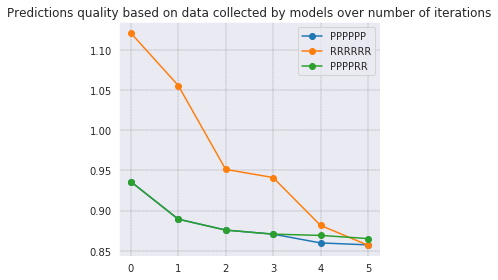

In [28]:
def simulate_scenario(scenario, label=''):
    users = test.groupby("userId")
    rates = {i : [] for i in range(n_questions)}
    all_knowledge = {i : {} for i in range(n_questions)}

    models = [scenario[i]() for i in range(n_questions)]
    for i in range(n_questions):
        models[i].precompute(train, movies)

    for uid, user in users:
        knowledge = {}
        for i in range(n_questions):
            model = models[i]
            question = model.ask(knowledge)
            #print("Asking about ids:", question)
            for mId in question:
                if user.loc[user.movieId == mId].movieId.count() > 0:
                    knowledge[mId] = user.loc[user.movieId == mId].rating.sum()
                else:
                    knowledge[mId] = UNKNOWN
            rates[i].append(knowledge_rate(knowledge))
            all_knowledge[i][user.userId.iloc[0]] = copy.copy(knowledge)
            
    #plt.plot(list(rates.keys()), np.mean(list(rates.values()), axis=1), marker='o', label=label)
    return rates, all_knowledge

def evaluate_scenario(scenario):
    print("Simulating")
    _rates, knowledge = simulate_scenario(scenario)
    accs = []
    for epoch in range(n_questions):
        print("Evaluating quality in", epoch, "epoch")
        test, train = split_data_by_konowledge(knowledge[epoch])
        acc = rate_predictions_quality(train, test)
        accs.append(acc)
    return accs
    

def make_scenario_name(scenario):
    return "".join([m.short for m in scenario])

def evaluate_scenarios(scenarios):
    global evaluate_scenarios_cache
    for scenario in scenarios:
        name = make_scenario_name(scenario)
        print("Scenario", name)

        if name not in evaluate_scenarios_cache:
            evaluate_scenarios_cache[name] = evaluate_scenario(scenario)
        result = evaluate_scenarios_cache[name] 

        plt.plot(list(range(n_questions)), result, marker='o', label=name)
        
    plt.grid(lw=0.3, ls='--', color='black', alpha=0.6)
    plt.title('Predictions quality based on data collected by models over number of iterations')
    plt.legend()
    plt.tight_layout()
    plt.show()


def make_simple_scenario(model: BaseModel):
    return [model for i in range(n_questions)]

scenarios = [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
]
evaluate_scenarios(scenarios)

Now I'm able to not think about drawing charts or reevaluating everything, because once calculated results just stay in cache, so I'm able to compare new model with all previous.

I implemented automatic scenarios name generating. It is string made of first letters of models. For example [PopularityModel, PopularityModel, RandomModel] is PPR. Longer names would not fit, and I don't want to force myself to come up with a name for every experiment. I think that these automatic names are very meaningful.

# VarianceModel

In meantime I have and idea to take movies with most variant ratings among most popular. Movies with variable ratings should be good in pigeonholing people. Because movies that everybody likes, or everybody hates aren't helpful.

Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR


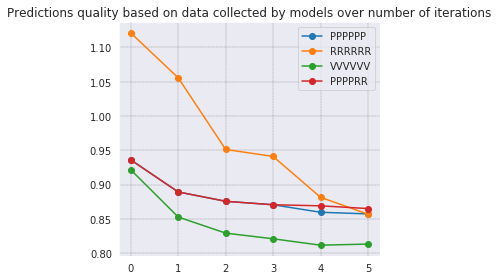

In [29]:

class VarianceModel(BaseModel):
    name = "VarianceModel"
    short = "V"
    def precompute(self, ratings, movies):
        popular = ratings.groupby('movieId').count().sort_values(['userId'], ascending=False).head(1000)

        r = ratings[ratings.movieId.isin(popular.index)].groupby('movieId').var().sort_values(['rating'], ascending=False).head(n_questions*40)
        self.most_popular = r.index

    def ask(self, known_user_ratings):
        ret = []
        n = 0
        for mId in self.most_popular:
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:

                return ret


scenarios = [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
]
evaluate_scenarios(scenarios)

After just 2 questions, VarianceModel is much better than all other after 4 questions. 

# DeterminingModel

Now I want to find movies, that are the best as an input to the predictor. 

I have an idea. Let's take N most popular movies, and sort them by accuracy of predicting other movies based only on this these single ones. It will be very computational heavy, so I will calculate weights only once and keep in static cache.

In [30]:
# static_DeterminingModel_storage_old = static_DeterminingModel_storage
static_DeterminingModel_storage = [8784, 16, 10, 32587, 33794, 1201, 3081, 7458, 60684, 2599, 2947, 8665, 1259, 1288, 293, 1580, 457, 3408, 1704, 337, 7147, 2006, 4995, 3052, 5445, 4014, 2273, 1909, 7143, 454, 3471, 32, 45722, 6, 2716, 4022, 2470, 6539, 6365, 4011, 593, 1466, 30707, 145, 49272, 80463, 555, 53125, 1291, 2455, 1222, 356, 3082, 150, 1097, 8529, 1339, 2000, 1307, 4027, 45499, 91529, 318, 3717, 6378, 292, 3147, 589, 1994, 2916, 79132, 5266, 597, 5418, 1302, 47, 3481, 1500, 474, 59315, 1393, 5349, 858, 1198, 1, 55820, 1220, 73017, 163, 34048, 2353, 3039, 1645, 70286, 1584, 6874, 68358, 5989, 8798, 2640, 608, 480, 5010, 2987, 7438, 3753, 2268, 539, 3671, 4270, 3793, 31696, 1090, 832, 1527, 56367, 1092, 349, 1552, 8368, 1408, 3578, 141, 7153, 165, 288, 3623, 5952, 3996, 1391, 1961, 1394, 2617, 2167, 77561, 1250, 508, 8783, 2572, 5219, 2011, 8949, 1246, 41569, 2329, 3114, 2105, 440, 367, 5464, 7451, 1345, 69122, 1073, 4720, 2692, 2762, 1573, 72998, 1270, 1921, 58559, 1356, 3253, 68157, 1784, 2115, 1214, 5378, 1722, 1127, 1407, 2797, 1265, 592, 3176, 3994, 7293, 1240, 1210, 5299, 8644, 89745, 54001, 223, 45447, 33679, 316, 8360, 111, 780, 208, 6377, 2194, 2001, 2321, 2529, 466, 4085, 648, 33493, 1036, 784, 2193, 3300, 2671, 1101, 1234, 1219, 44191, 380, 54286, 4306, 6863, 904, 5502, 6934, 1080, 1207, 4993, 1370, 903, 2, 377, 520, 4963, 1608, 2571, 3160, 2763, 2302, 2028, 736, 8636, 235, 353, 485, 1396, 59615, 1320, 1387, 4776, 1275, 6373, 5459, 4262, 33166, 2003, 8528, 733, 1225, 2918, 1213, 3448, 1544, 70, 1304, 4018, 4369, 364, 1196, 1954, 4571, 357, 3175, 1221, 40815, 6947, 908, 2174, 1266, 5388, 5218, 2542, 47610, 95, 1610, 2002, 1193, 104, 1732, 2539, 4886, 1374, 2502, 5679, 74458, 1088, 2699, 2324, 4034, 48516, 586, 368, 3755, 3255, 1215, 51662, 3624, 7254, 8361, 8376, 7373, 30812, 63082, 2700, 3252, 56174, 2420, 3527, 2406, 4718, 1079, 6333, 8641, 329, 2694, 3785, 3033, 2628, 3489, 2683, 1673, 2396, 1278, 1690, 1968, 153, 68954, 953, 1923, 3702, 4344, 34405, 21, 8972, 1199, 51255, 2355, 1653, 2701, 434, 1682, 4638, 1230, 110, 1639, 1377, 1200, 34162, 1517, 590, 1997, 1625, 4447, 53996, 2890, 1485, 6534, 8464, 919, 4148, 1747, 1721, 5377, 1748, 2294, 3752, 1247, 1203, 2012, 260, 30793, 1729, 48394, 185, 4246, 500, 912, 3948, 34, 1263, 48780, 5618, 3421, 50872, 1089, 48774, 2997, 2791, 4226, 4973, 33004, 3949, 1617, 587, 1876, 8984, 5816, 8961, 1028, 5956, 6502, 4025, 54503, 41566, 3552, 541, 2985, 2858, 1676, 2959, 4975, 5481, 2424, 1252, 6537, 4643, 5995, 4896, 1380, 50, 1562, 253, 1884, 2081, 3868, 1777, 8874, 2804, 1136, 344, 6541, 4874, 1035, 64614, 1917, 588, 4367, 1882, 6157, 35836, 2054, 788, 2706, 4816, 2717, 1197, 6870, 19, 1333, 4370, 3499, 3897, 8622, 778, 6942, 4878, 527, 2710, 2005, 923, 1258, 2291, 60069, 4310, 442, 2078, 2712, 4308, 3535, 595, 231, 3751, 2395, 39, 1208, 7361, 750, 3977, 551, 5902, 1641, 3418, 296, 594, 2953, 5669, 46578, 5991, 924, 4979, 6711, 2288, 48385, 2161, 2124, 2657, 1206, 4848]
print(evaluate_scenarios_cache)
# evaluate_scenarios_cache['DDDDDD'] = evaluate_scenarios_cache['DDDDDD_old']
# del evaluate_scenarios_cache['DDDDDD']
# {'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324]}
# evaluate_scenarios_cache = {'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324]}

{'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324], 'VSSSSS': [0.9215244360521273, 0.8618570728558881, 0.8293064807546512, 0.8210136598025107, 0.8163183893448518, 0.8123671711044542]}


Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR
Scenario DDDDDD


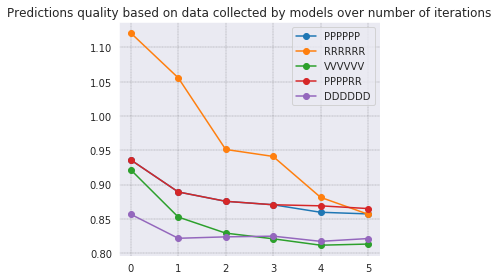

In [31]:

class DeterminingModel(BaseModel):
    name = "DeterminingModel"
    short = "D"

    def _compute_determinance(self, movieId, train, test):
        knowledge = {}
        for row in test.itertuples():
            if row.movieId == movieId:
                knowledge[row.userId] = {movieId: row.rating}
        new_test, new_train = split_data_by_konowledge(knowledge, train, test)
        acc = rate_predictions_quality(new_train, new_test)
        return acc


    def precompute(self, ratings, movies):
        global static_DeterminingModel_storage
        if static_DeterminingModel_storage is not None:
            # self.best = static_DeterminingModel_storage
            return

        popularMIds = ratings.groupby('movieId').count().sort_values(['userId'], ascending=False).head(500).index

        # split trainset into temporary trainset and testset, because I need a testset
        train_inds, test_inds = next(GroupShuffleSplit(test_size=0.05, train_size=0.15, random_state=1, n_splits=2).split(ratings, groups=ratings['userId']))
        train_tmp = ratings.iloc[train_inds]
        test_tmp = ratings.iloc[test_inds]

        ranks = {}
        i = 0
        for movieId in popularMIds:
            rank = self._compute_determinance(movieId, train_tmp, test_tmp)
            ranks[movieId] = rank
            print(i / len(popularMIds))
            i+=1

        print(ranks)        
        # self.best = 
        static_DeterminingModel_storage = [k[0] for k in sorted(ranks.items(), key=lambda item: item[1])]

    def ask(self, known_user_ratings):
        ret = []
        n = 0
        # print(static_DeterminingModel_storage)
        for mId in static_DeterminingModel_storage:
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:

                return ret


scenarios = [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
    make_simple_scenario(DeterminingModel),
]
evaluate_scenarios(scenarios)

The results are very good, after just two steps it is as good as VarianceModel after 6 steps, and better after first step, that every other model after 6 steps.

Because of computational complexity, I was able to train it only on very small subset of available data. I'm pretty sure that with algorithm optimizations, better machine and a lot of time I would get much better results. 

In [0]:
# scenarios = [
#     make_simple_scenario(PopularityModel),
#     make_simple_scenario(RandomModel),
#     make_simple_scenario(VarianceModel),
#     [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
#     make_simple_scenario(DeterminingModel),
# evaluate_scenarios(scenarios)




# SimilarityModel - ask for movies that user probably knows

Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR
Scenario DDDDDD
Scenario VSSSSS


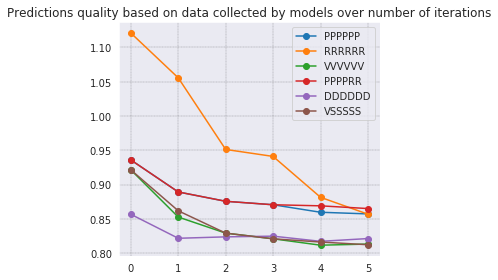

In [32]:
_SimilarityModel_static_cache = None

class SimilarityModel(BaseModel):
    name = "SimilarityModel"
    short = "S"

    def precompute(self, ratings, movies):
        
        global _SimilarityModel_static_cache
        if _SimilarityModel_static_cache is not None:
            return
        # movies are vertices, edges are amount of people that rated both movies

        popular_grouped = ratings.groupby('movieId').count().sort_values(['userId'], ascending=False).head(1000)
        popularMIds = popular_grouped.index
        self.popularMIds = popularMIds
        
        uids = ratings.groupby('userId').count().index
        popular = ratings[ratings.movieId.isin(popularMIds)]
        
        user_movies = {u: [] for u in uids}
        for MId in popularMIds:
            raters = popular[popular.movieId == MId].groupby('userId').count().index
            
            for u in raters:
                user_movies[u].append(MId)
                

        edges = {mid:{mid2:0 for mid2 in popularMIds} for mid in popularMIds}
        
        for u in uids:
            for m1 in user_movies[u]:
                for m2 in user_movies[u]:
                    edges[m1][m2] += 1

        _SimilarityModel_static_cache = edges


            
    def ask(self, known_user_ratings):
        ret = []
        n = 0

        weights = {mid : 0 for mid in _SimilarityModel_static_cache.keys()}

        for mid, rating in known_user_ratings.items():
            if mid in _SimilarityModel_static_cache:
                for mid2 in _SimilarityModel_static_cache[mid]:
                    if rating != UNKNOWN:
                        weights[mid2] += _SimilarityModel_static_cache[mid][mid2]
                    else:
                        weights[mid2] -= _SimilarityModel_static_cache[mid][mid2]

        sorted_w = [k[0] for k in sorted(weights.items(), key=lambda item: item[1], reverse=True)]

        for mId in sorted_w:
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:
                return ret

# del evaluate_scenarios_cache['SSSSSS']
scenarios = [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
    make_simple_scenario(DeterminingModel),
    [VarianceModel] * 1 + [SimilarityModel] * (n_questions - 1),
    # [VarianceModel] * 1 + [SimilarityModel] * (n_questions - 1),
    # [PopularityModel] * 1 + [SimilarityModel] * (n_questions - 1),
]
evaluate_scenarios(scenarios)

SimilarityModel is better than I expected, and it outruns all others in 6th epoch. I will try to run it but starting with Determining model.

Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR
Scenario DDDDDD
Scenario DSSSSS
Simulating
Evaluating quality in 0 epoch
MSE: 0.8386
Evaluating quality in 1 epoch
MSE: 0.8257
Evaluating quality in 2 epoch
MSE: 0.8391
Evaluating quality in 3 epoch
MSE: 0.8442
Evaluating quality in 4 epoch
MSE: 0.8431
Evaluating quality in 5 epoch
MSE: 0.8410
Scenario DDSSSS
Simulating
Evaluating quality in 0 epoch
MSE: 0.8386
Evaluating quality in 1 epoch
MSE: 0.8359
Evaluating quality in 2 epoch
MSE: 0.8328
Evaluating quality in 3 epoch
MSE: 0.8335
Evaluating quality in 4 epoch
MSE: 0.8359
Evaluating quality in 5 epoch
MSE: 0.8330


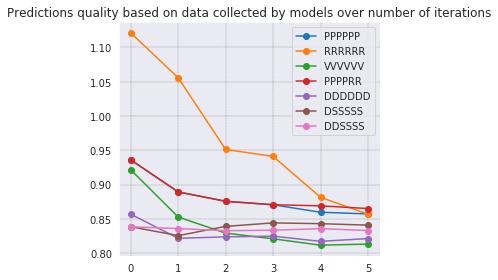

In [33]:
scenarios = [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
    make_simple_scenario(DeterminingModel),
    [DeterminingModel] * 1 + [SimilarityModel] * (n_questions - 1),
    [DeterminingModel] * 2 + [SimilarityModel] * (n_questions - 2),
]
evaluate_scenarios(scenarios)

In [34]:
 
 print(static_DeterminingModel_storage)

[8784, 16, 10, 32587, 33794, 1201, 3081, 7458, 60684, 2599, 2947, 8665, 1259, 1288, 293, 1580, 457, 3408, 1704, 337, 7147, 2006, 4995, 3052, 5445, 4014, 2273, 1909, 7143, 454, 3471, 32, 45722, 6, 2716, 4022, 2470, 6539, 6365, 4011, 593, 1466, 30707, 145, 49272, 80463, 555, 53125, 1291, 2455, 1222, 356, 3082, 150, 1097, 8529, 1339, 2000, 1307, 4027, 45499, 91529, 318, 3717, 6378, 292, 3147, 589, 1994, 2916, 79132, 5266, 597, 5418, 1302, 47, 3481, 1500, 474, 59315, 1393, 5349, 858, 1198, 1, 55820, 1220, 73017, 163, 34048, 2353, 3039, 1645, 70286, 1584, 6874, 68358, 5989, 8798, 2640, 608, 480, 5010, 2987, 7438, 3753, 2268, 539, 3671, 4270, 3793, 31696, 1090, 832, 1527, 56367, 1092, 349, 1552, 8368, 1408, 3578, 141, 7153, 165, 288, 3623, 5952, 3996, 1391, 1961, 1394, 2617, 2167, 77561, 1250, 508, 8783, 2572, 5219, 2011, 8949, 1246, 41569, 2329, 3114, 2105, 440, 367, 5464, 7451, 1345, 69122, 1073, 4720, 2692, 2762, 1573, 72998, 1270, 1921, 58559, 1356, 3253, 68157, 1784, 2115, 1214, 5378, 1

Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR
Scenario DDDDDD
Scenario DSSSSS
Scenario DDSSSS


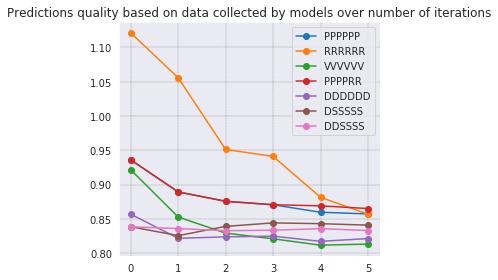

In [35]:
scenarios = [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
    make_simple_scenario(DeterminingModel),
    [DeterminingModel] * 1 + [SimilarityModel] * (n_questions - 1),
    [DeterminingModel] * 2 + [SimilarityModel] * (n_questions - 2),
]
evaluate_scenarios(scenarios)

Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR
Scenario DDDDDD
Scenario V1V1V1V1V1V1
Simulating
Evaluating quality in 0 epoch
MSE: 0.8386
Evaluating quality in 1 epoch
MSE: 0.8475
Evaluating quality in 2 epoch
MSE: 0.8389
Evaluating quality in 3 epoch
MSE: 0.8376
Evaluating quality in 4 epoch
MSE: 0.8288
Evaluating quality in 5 epoch
MSE: 0.8290


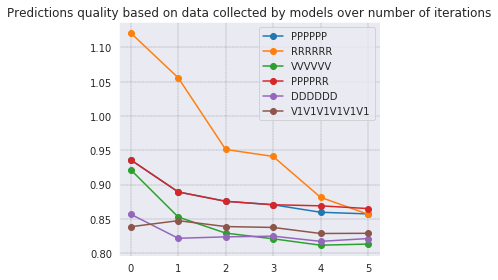

In [36]:
# _SimilarityModel_static_cache = None
def normalize(d, target=1.0):
   raw = sum(d.values())
   if raw == 0:
       raw = 1
   factor = target/raw
   return {key:value*factor for key,value in d.items()}

class VotingModel(BaseModel):
    name = "VotingModel"
    short = "V1"

    def precompute(self, ratings, movies):
        SimilarityModel.precompute(self, ratings, movies)
        # global _SimilarityModel_static_cache
        # if _SimilarityModel_static_cache is not None:
        #     return
        # # movies are vertices, edges are amount of people that rated both movies

        # popular_grouped = ratings.groupby('movieId').count().sort_values(['userId'], ascending=False).head(1000)
        # popularMIds = popular_grouped.index
        # self.popularMIds = popularMIds
        
        # uids = ratings.groupby('userId').count().index
        # popular = ratings[ratings.movieId.isin(popularMIds)]
        
        # user_movies = {u: [] for u in uids}
        # for MId in popularMIds:
        #     raters = popular[popular.movieId == MId].groupby('userId').count().index
            
        #     for u in raters:
        #         user_movies[u].append(MId)
                

        # edges = {mid:{mid2:0 for mid2 in popularMIds} for mid in popularMIds}
        
        # for u in uids:
        #     for m1 in user_movies[u]:
        #         for m2 in user_movies[u]:
        #             edges[m1][m2] += 1

        # _SimilarityModel_static_cache = edges


            
    def ask(self, known_user_ratings):
        ret = []
        n = 0

        weights = {mid : 0 for mid in _SimilarityModel_static_cache.keys()}

        for mid, rating in known_user_ratings.items():
            if mid in _SimilarityModel_static_cache:
                for mid2 in _SimilarityModel_static_cache[mid]:
                    if rating != UNKNOWN:
                        weights[mid2] += _SimilarityModel_static_cache[mid][mid2]
                    else:
                        weights[mid2] -= _SimilarityModel_static_cache[mid][mid2]

        sim = normalize(weights)
        # print(sim)
        det = {}
        i = len(static_DeterminingModel_storage)
        for mid in static_DeterminingModel_storage:
            det[mid] = i
            i -= 1
        det = normalize(det)
        # print(det)

        comp = {mid: det[mid] + sim[mid] for mid in det if mid in sim}
        # print(comp)
        sort = [k[0] for k in sorted(comp.items(), key=lambda item: item[1], reverse=True)]
        # sorted_similarity = [k[0] for k in sorted(weights.items(), key=lambda item: item[1], reverse=True)]
        for mId in sort:
            if mId not in known_user_ratings:
                ret.append(mId)
                n += 1
            if n == 40:
                return ret

# del evaluate_scenarios_cache['SSSSSS']
scenarios= [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
    make_simple_scenario(DeterminingModel),
    # [DeterminingModel] * 1 + [SimilarityModel] * (n_questions - 1),
    # [DeterminingModel] * 2 + [SimilarityModel] * (n_questions - 2),
    make_simple_scenario(VotingModel),
]
evaluate_scenarios(scenarios)

Funny thing is, that new model is better only in first step, when there is no infor form similarity model. I don't see good explaination, so this is accident, and I abandon this model.

Scenario PPPPPP
Scenario RRRRRR
Scenario VVVVVV
Scenario PPPPRR
Scenario DDDDDD
Scenario V1V1V1V1V1V1
Scenario V1DDDDD
Simulating
Evaluating quality in 0 epoch
MSE: 0.8386
Evaluating quality in 1 epoch
MSE: 0.8359
Evaluating quality in 2 epoch
MSE: 0.8263
Evaluating quality in 3 epoch
MSE: 0.8253
Evaluating quality in 4 epoch
MSE: 0.8258
Evaluating quality in 5 epoch
MSE: 0.8274


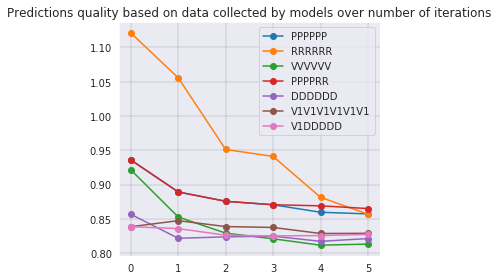

In [37]:
scenarios= [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    [PopularityModel] * 4 + [RandomModel] * (n_questions - 4),
    make_simple_scenario(DeterminingModel),
    make_simple_scenario(VotingModel),
    [VotingModel] * 1 + [DeterminingModel] * (n_questions - 1),
]
evaluate_scenarios(scenarios)

In [38]:

print(evaluate_scenarios_cache)
#{'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324], 'VSSSSS': [0.9215244360521273, 0.8618570728558881, 0.8293064807546512, 0.8210136598025107, 0.8163183893448518, 0.8123671711044542], 'DSSSSS': [0.8386202747939407, 0.8256707591397906, 0.8391380601698503, 0.8442148534120848, 0.8430859925543472, 0.8409568364110325], 'DDSSSS': [0.8386202747939407, 0.8359308204528123, 0.8328423098891384, 0.8335490478851892, 0.8358515769869793, 0.8330186906943752], 'V1V1V1V1V1V1': [0.8386202747939407, 0.8474863588293369, 0.8388678312595658, 0.8375865206290564, 0.8287760385928127, 0.8290306848268169]}

{'PPPPPP': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8597242575409864, 0.8573237885668266], 'RRRRRR': [1.12105031744191, 1.0556792682389728, 0.9512912112767564, 0.9411302655843916, 0.8815524683331506, 0.8569151430059686], 'PPPPRR': [0.9359933649809667, 0.889321495117855, 0.8757182854053718, 0.8706722829531827, 0.8691027377764156, 0.8651215087581197], 'VVVVVV': [0.9215244360521273, 0.8527587175805118, 0.8293091450414738, 0.8210447499626596, 0.811715673917181, 0.8133545402148723], 'DDDDDD': [0.8567641455154198, 0.8217901854531975, 0.8238648985055116, 0.8248889514808363, 0.8173463970320206, 0.8213837589829324], 'VSSSSS': [0.9215244360521273, 0.8618570728558881, 0.8293064807546512, 0.8210136598025107, 0.8163183893448518, 0.8123671711044542], 'DSSSSS': [0.8386202747939407, 0.8256707591397906, 0.8391380601698503, 0.8442148534120848, 0.8430859925543472, 0.8409568364110325], 'DDSSSS': [0.8386202747939407, 0.8359308204528123, 0.8328423098891384, 0.8335490

[8784, 16, 10, 32587, 33794, 1201, 3081, 7458, 60684, 2599, 2947, 8665, 1259, 1288, 293, 1580, 457, 3408, 1704, 337, 7147, 2006, 4995, 3052, 5445, 4014, 2273, 1909, 7143, 454, 3471, 32, 45722, 6, 2716, 4022, 2470, 6539, 6365, 4011, 593, 1466, 30707, 145, 49272, 80463, 555, 53125, 1291, 2455, 1222, 356, 3082, 150, 1097, 8529, 1339, 2000, 1307, 4027, 45499, 91529, 318, 3717, 6378, 292, 3147, 589, 1994, 2916, 79132, 5266, 597, 5418, 1302, 47, 3481, 1500, 474, 59315, 1393, 5349, 858, 1198, 1, 55820, 1220, 73017, 163, 34048, 2353, 3039, 1645, 70286, 1584, 6874, 68358, 5989, 8798, 2640, 608, 480, 5010, 2987, 7438, 3753, 2268, 539, 3671, 4270, 3793, 31696, 1090, 832, 1527, 56367, 1092, 349, 1552, 8368, 1408, 3578, 141, 7153, 165, 288, 3623, 5952, 3996, 1391, 1961, 1394, 2617, 2167, 77561, 1250, 508, 8783, 2572, 5219, 2011, 8949, 1246, 41569, 2329, 3114, 2105, 440, 367, 5464, 7451, 1345, 69122, 1073, 4720, 2692, 2762, 1573, 72998, 1270, 1921, 58559, 1356, 3253, 68157, 1784, 2115, 1214, 5378, 1

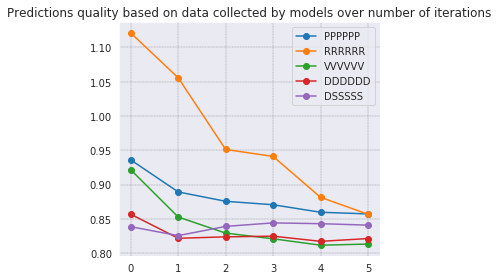

In [41]:
 print(static_DeterminingModel_storage)
  
scenarios= [
    make_simple_scenario(PopularityModel),
    make_simple_scenario(RandomModel),
    make_simple_scenario(VarianceModel),
    make_simple_scenario(DeterminingModel),
    [DeterminingModel] * 1 + [SimilarityModel] * (n_questions - 1),
]
evaluate_scenarios(scenarios)
#  static_DeterminingModel_storage = [8784, 16, 10, 32587, 33794, 1201, 3081, 7458, 60684, 2599, 2947, 8665, 1259, 1288, 293, 1580, 457, 3408, 1704, 337, 7147, 2006, 4995, 3052, 5445, 4014, 2273, 1909, 7143, 454, 3471, 32, 45722, 6, 2716, 4022, 2470, 6539, 6365, 4011, 593, 1466, 30707, 145, 49272, 80463, 555, 53125, 1291, 2455, 1222, 356, 3082, 150, 1097, 8529, 1339, 2000, 1307, 4027, 45499, 91529, 318, 3717, 6378, 292, 3147, 589, 1994, 2916, 79132, 5266, 597, 5418, 1302, 47, 3481, 1500, 474, 59315, 1393, 5349, 858, 1198, 1, 55820, 1220, 73017, 163, 34048, 2353, 3039, 1645, 70286, 1584, 6874, 68358, 5989, 8798, 2640, 608, 480, 5010, 2987, 7438, 3753, 2268, 539, 3671, 4270, 3793, 31696, 1090, 832, 1527, 56367, 1092, 349, 1552, 8368, 1408, 3578, 141, 7153, 165, 288, 3623, 5952, 3996, 1391, 1961, 1394, 2617, 2167, 77561, 1250, 508, 8783, 2572, 5219, 2011, 8949, 1246, 41569, 2329, 3114, 2105, 440, 367, 5464, 7451, 1345, 69122, 1073, 4720, 2692, 2762, 1573, 72998, 1270, 1921, 58559, 1356, 3253, 68157, 1784, 2115, 1214, 5378, 1722, 1127, 1407, 2797, 1265, 592, 3176, 3994, 7293, 1240, 1210, 5299, 8644, 89745, 54001, 223, 45447, 33679, 316, 8360, 111, 780, 208, 6377, 2194, 2001, 2321, 2529, 466, 4085, 648, 33493, 1036, 784, 2193, 3300, 2671, 1101, 1234, 1219, 44191, 380, 54286, 4306, 6863, 904, 5502, 6934, 1080, 1207, 4993, 1370, 903, 2, 377, 520, 4963, 1608, 2571, 3160, 2763, 2302, 2028, 736, 8636, 235, 353, 485, 1396, 59615, 1320, 1387, 4776, 1275, 6373, 5459, 4262, 33166, 2003, 8528, 733, 1225, 2918, 1213, 3448, 1544, 70, 1304, 4018, 4369, 364, 1196, 1954, 4571, 357, 3175, 1221, 40815, 6947, 908, 2174, 1266, 5388, 5218, 2542, 47610, 95, 1610, 2002, 1193, 104, 1732, 2539, 4886, 1374, 2502, 5679, 74458, 1088, 2699, 2324, 4034, 48516, 586, 368, 3755, 3255, 1215, 51662, 3624, 7254, 8361, 8376, 7373, 30812, 63082, 2700, 3252, 56174, 2420, 3527, 2406, 4718, 1079, 6333, 8641, 329, 2694, 3785, 3033, 2628, 3489, 2683, 1673, 2396, 1278, 1690, 1968, 153, 68954, 953, 1923, 3702, 4344, 34405, 21, 8972, 1199, 51255, 2355, 1653, 2701, 434, 1682, 4638, 1230, 110, 1639, 1377, 1200, 34162, 1517, 590, 1997, 1625, 4447, 53996, 2890, 1485, 6534, 8464, 919, 4148, 1747, 1721, 5377, 1748, 2294, 3752, 1247, 1203, 2012, 260, 30793, 1729, 48394, 185, 4246, 500, 912, 3948, 34, 1263, 48780, 5618, 3421, 50872, 1089, 48774, 2997, 2791, 4226, 4973, 33004, 3949, 1617, 587, 1876, 8984, 5816, 8961, 1028, 5956, 6502, 4025, 54503, 41566, 3552, 541, 2985, 2858, 1676, 2959, 4975, 5481, 2424, 1252, 6537, 4643, 5995, 4896, 1380, 50, 1562, 253, 1884, 2081, 3868, 1777, 8874, 2804, 1136, 344, 6541, 4874, 1035, 64614, 1917, 588, 4367, 1882, 6157, 35836, 2054, 788, 2706, 4816, 2717, 1197, 6870, 19, 1333, 4370, 3499, 3897, 8622, 778, 6942, 4878, 527, 2710, 2005, 923, 1258, 2291, 60069, 4310, 442, 2078, 2712, 4308, 3535, 595, 231, 3751, 2395, 39, 1208, 7361, 750, 3977, 551, 5902, 1641, 3418, 296, 594, 2953, 5669, 46578, 5991, 924, 4979, 6711, 2288, 48385, 2161, 2124, 2657, 1206, 4848]